In [1]:
# generally useful imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as  sc

import geopandas as gpd
from matplotlib.collections import PatchCollection

# For interactive plots
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# Introduction

In our analysis we use multiple Datasets of the **Food and Agriculture Organization of the United Nations** (Faostat). 
We start by exploring the Production Livestock Dataset which gives us an broader view of the *Beehives Population* in the world and more fine grained in different continents and countries. 
The following cell describes the research question we plan to solve during our analysis. 

**Research questions**
- How is the beehives population distributed throughout the world?
- How is the population changing over time?
- Influence of reduction/growth of beehives population?
- Does the reduction/growth of beehives affect other factors?
- Can we find patterns why beehives reduce/grow in population?
- Will the bees survive?

# Data Analysis

### Load the data

We simply start our analysis by loading the *Live Animals* dataset (called Production Livestock), which shows us the annual number of different animals between 1961 and 2017. Since we only care about beehives we have to filter our dataset according to this item. Within the group of animals are also beehives, which we us as a value of the total number of bees. Faostat defines beehives to be "an artificial habitation for bees".  



In [2]:
#load the data
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')

In [3]:
livestock.Item.unique()

array(['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
       'Mules', 'Sheep', 'Cattle and Buffaloes', 'Poultry Birds',
       'Sheep and Goats', 'Beehives', 'Buffaloes', 'Ducks',
       'Geese and guinea fowls', 'Pigs', 'Turkeys', 'Rabbits and hares',
       'Camelids, other', 'Rodents, other', 'Animals live nes',
       'Pigeons, other birds'], dtype=object)

In [4]:
beehives = livestock.loc[livestock['Item'] == 'Beehives']
beehives.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
684,3,Albania,1181,Beehives,5114,Stocks,1961,1961,No,95100.0,NaN
685,3,Albania,1181,Beehives,5114,Stocks,1962,1962,No,92800.0,NaN
686,3,Albania,1181,Beehives,5114,Stocks,1963,1963,No,83500.0,NaN
687,3,Albania,1181,Beehives,5114,Stocks,1964,1964,No,96500.0,NaN
688,3,Albania,1181,Beehives,5114,Stocks,1965,1965,No,109800.0,NaN


## We further clean our Dataset

During this process we are cleaning our dataset in order to be able to use throughout our analysis. 
We first observed the "Area" field not to be consistent and needed to split the dataset into smaller subcategories (i.e. countries, continent).

In [5]:
beehives.Area.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
       'Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia',
       'Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia',
       'Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya',
       'Kyrgyzstan', 'Latvia', 'Lebanon', 'L

This looks like a lot of countries.
We can further split the countries and see that they actually have countries, continents, regions, consolidations and areas are already reasonably grouped within the data. 
We further explore that some of the countries do not exist anymore. We will take this as given. We could observe that USSR as well as Yugoslavia splitted in 1992. We can use this fact to have a look at the last 25 Years of bees. 

In [6]:
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']
world = ['World']
continents = ['Africa','Americas', 'Asia',  'Europe', 'Oceania']
regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa', 'Northern America', 'South America', 'Central America', 'Caribbean','Central Asia', 'Eastern Asia', 'Southern Asia', 'South-Eastern Asia', 'Western Asia', 'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Melanesia', 'Micronesia', 'Polynesia', 'Australia & New Zealand']
consolidations = ['European Union', 'China, mainland', 'China, Taiwan Province of']
index_based = ['Least Developed Countries', 'Land Locked Developing Countries','Small Island Developing States','Low Income Food Deficit Countries', 'Net Food Importing Developing Countries']

In [7]:
beehives_countries = beehives[beehives['Area'].isin(countries)]
beehives_world = beehives.loc[beehives['Area'] == 'World']
beehives_continents = beehives[beehives['Area'].isin(continents)]
beehives_regions = beehives[beehives['Area'].isin(regions)]
beehives_consolidations = beehives.loc[beehives['Area'] == 'European Union']
beehives_index_based = beehives[beehives['Area'].isin(index_based)]

## Beehives population over time and area (Let us plot the world)

Luckily we have a world column which is the sum of the number of beehives over all countries. 
So we first simply plot the world Distribution.  
Like this we can start answering our first two research questions how is the bees population changing over time. Further analysis helped us answering how the bee population is distributed. 

First a world plot.

(1960, 2020)

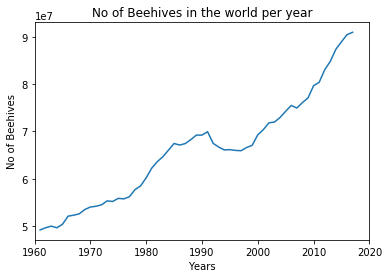

In [8]:
plt.plot(beehives_world['Year'], beehives_world['Value'])
plt.title('No of Beehives in the world per year')
plt.xlabel('Years')
plt.ylabel('No of Beehives')
plt.xlim(1960, 2020)

This plot gives us some useful information! This was not what we expected.   
We observe an increasing number of beehives. But wasn't everyone saying bees are dying?  
We can further notice a drop of beehives between 1991 and 2000. Where does this drop come from? 

## Oh we actually see the number of bees are increasing!

By how much is the number increasing? 

In [9]:
firstYear = int(beehives_world[beehives_world['Year'] == 1961]['Value'])
lastYear = int(beehives_world[beehives_world['Year'] == 2017]['Value'])
lastYear/firstYear

1.8505857822977034

In fact we have an increase of 185.06% over the last 56 Years. 

Looking only at the world between 1990 and 2000 we actually see a drop. We ellaborate further on this. 

In [10]:
beehives_world[beehives_world['Year'].isin(range(1990,2001))]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
137264,5000,World,1181,Beehives,5114,Stocks,1990,1990,No,69237913.0,A
137265,5000,World,1181,Beehives,5114,Stocks,1991,1991,No,69952217.0,A
137266,5000,World,1181,Beehives,5114,Stocks,1992,1992,No,67491710.0,A
137267,5000,World,1181,Beehives,5114,Stocks,1993,1993,No,66704017.0,A
137268,5000,World,1181,Beehives,5114,Stocks,1994,1994,No,66102588.0,A
137269,5000,World,1181,Beehives,5114,Stocks,1995,1995,No,66163866.0,A
137270,5000,World,1181,Beehives,5114,Stocks,1996,1996,No,65992745.0,A
137271,5000,World,1181,Beehives,5114,Stocks,1997,1997,No,65933672.0,A
137272,5000,World,1181,Beehives,5114,Stocks,1998,1998,No,66607596.0,A
137273,5000,World,1181,Beehives,5114,Stocks,1999,1999,No,67072126.0,A


In [11]:
(1-(65933672.0/69952217.0))*100 #taking into account the local maxima year 1991 and the local minima year 1997.

5.744699985705958

In [12]:
69952217-65933672

4018545

Looking only at these 10 Years (1990-2000) we se the population droped by a number of 4.018.545. Which is a drop of 5.74%
Why is that? 

## Let us try to figure out what happened in between 1990 and 2000. We know there was war in Yugslavia (Bosnia and Herzegovina,  Croatia, Kosovo,  Montenegro,  North Macedonia,  Serbia, Slovenia).

War could be one reason. 

In [13]:
beehives_yugoslav = beehives_countries.loc[beehives_countries['Area'] == 'Yugoslav SFR']

In [14]:
beehives_yugoslav[beehives_yugoslav['Year'].isin(range(1990,2001))]

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
135405,248,Yugoslav SFR,1181,Beehives,5114,Stocks,1990,1990,No,501349.0,*
135406,248,Yugoslav SFR,1181,Beehives,5114,Stocks,1991,1991,No,520275.0,*


Here we only observe data until 1991. Which is because the countries in Yugoslavia announced independence. We will now look into the splitted countries to see what happened after.

In [15]:
beehives_countries.loc[beehives_countries['Area'] == 'Croatia']
beehives_countries.loc[beehives_countries['Area'] == 'Bosnia and Herzegovina']
beehives_countries.loc[beehives_countries['Area'] == 'Slovenia']
beehives_countries.loc[beehives_countries['Area'] == 'The former Yugoslav Republic of Macedonia']
beehives_countries.loc[beehives_countries['Area'] == 'Serbia and Montenegro']

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
109557,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1992,1992,No,197000.0,NaN
109558,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1993,1993,No,196000.0,NaN
109559,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1994,1994,No,194000.0,NaN
109560,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1995,1995,No,205000.0,NaN
109561,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1996,1996,No,186000.0,NaN
109562,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1997,1997,No,197000.0,NaN
109563,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1998,1998,No,196000.0,NaN
109564,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,1999,1999,No,190900.0,NaN
109565,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,2000,2000,No,192000.0,NaN
109566,186,Serbia and Montenegro,1181,Beehives,5114,Stocks,2001,2001,No,221000.0,NaN


In [16]:
for year in range(1992, 2001):
    croatia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Croatia') & (beehives_countries['Year'] == year)]['Value'])
    bosnia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Bosnia and Herzegovina') & (beehives_countries['Year'] == year)]['Value'])
    slovenia = int(beehives_countries.loc[(beehives_countries['Area'] == 'Slovenia') & (beehives_countries['Year'] == year)]['Value'])
    macedonia = int(beehives_countries.loc[(beehives_countries['Area'] == 'The former Yugoslav Republic of Macedonia') & (beehives_countries['Year'] == year)]['Value'])
    sm = int(beehives_countries.loc[(beehives_countries['Area'] == 'Serbia and Montenegro') & (beehives_countries['Year'] == year)]['Value'])
    print("Year: %s, No of Beehives: %s" % (year , croatia+bosnia+slovenia+macedonia+sm))

Year: 1992, No of Beehives: 449211
Year: 1993, No of Beehives: 496381
Year: 1994, No of Beehives: 519883
Year: 1995, No of Beehives: 534171
Year: 1996, No of Beehives: 502684
Year: 1997, No of Beehives: 550382
Year: 1998, No of Beehives: 606355
Year: 1999, No of Beehives: 545543
Year: 2000, No of Beehives: 644972


Looking at our data we see that this cannot be the reason and that war is not killing bees and even increase. Since the values stayed pretty stable. We will look into countries having greater drop between 1992 and 1995.

So in which other countries do bees decrease?

## Decreasing Countries 1992-1997

Let us now dive deeper into countries.  
We try to figure out countries that experienced a significant drop of bees between 1992 and 1997.

In [17]:
count_decreasingNumber = 0
big_decrease = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1997)]['Value'])
        if sm2/sm1 < 1:
            count_decreasingNumber += 1
        #if sm2-sm1<-100000:
        if ((1-(sm2/sm1))*100)>66 or sm2-sm1<-100000:
            print(country)
            print("Ratio 1997/1992: -%.2f%%" % ((1-(sm2/sm1))*100))
            print("Number of Beehives in 1992: %d" % sm1)
            print("Number of Beehives in 1997: %d" % sm2)
            print("------------------")
            big_decrease.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-1997 decreased in %s of %s countries." % (count_decreasingNumber, len(countries)))

Austria
Ratio 1997/1992: -21.04%
Number of Beehives in 1992: 483212
Number of Beehives in 1997: 381567
------------------
Bulgaria
Ratio 1997/1992: -46.11%
Number of Beehives in 1992: 493540
Number of Beehives in 1997: 265984
------------------
China
Ratio 1997/1992: -10.08%
Number of Beehives in 1992: 7700420
Number of Beehives in 1997: 6924345
------------------
Egypt
Ratio 1997/1992: -10.27%
Number of Beehives in 1992: 1415000
Number of Beehives in 1997: 1269730
------------------
Germany
Ratio 1997/1992: -18.49%
Number of Beehives in 1992: 1168000
Number of Beehives in 1997: 952000
------------------
Guatemala
Ratio 1997/1992: -59.97%
Number of Beehives in 1992: 199830
Number of Beehives in 1997: 80000
------------------
Honduras
Ratio 1997/1992: -66.67%
Number of Beehives in 1992: 30000
Number of Beehives in 1997: 10000
------------------
Italy
Ratio 1997/1992: -23.90%
Number of Beehives in 1992: 1314000
Number of Beehives in 1997: 1000000
------------------
Latvia
Ratio 1997/1992

A significant decrease >100.000 or over 66% beehives can be noticed in the following countries.

In [18]:
print(*big_decrease, sep = ", ")  

Austria, Bulgaria, China, Egypt, Germany, Guatemala, Honduras, Italy, Latvia, Lithuania, Mexico, Mongolia, Poland, Romania, Russian Federation, Tajikistan, United States of America, Uzbekistan, Venezuela (Bolivarian Republic of)


So now let us plot these countries. Are they seriously decreasing. 

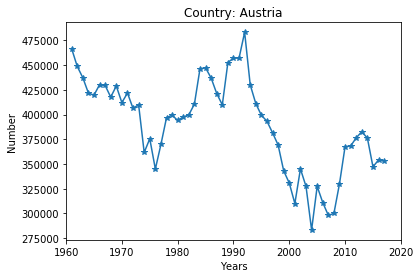

In [19]:
@interact
def show_beehives_for_country(country=big_decrease):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2020)

Looking at these plots we see that Bulgaria, China and Romania recovered quickly after the decline, while Egypt, Germany, Poland, Romania and the United States of America dropped the numbers continously.

Here we could talk about the number that each country reduced.
Some of them increased even over 65 percent. 

## Is this trend continuing up to the year 2017?

In [20]:
count_decreasingNumber2017 = 0
big_decrease2017 = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 2017)]['Value'])
        if sm2/sm1 < 1:
            count_decreasingNumber2017 += 1
        if ((1-(sm2/sm1))*100)>66 or sm2-sm1<-100000:
            print(country)
            print("Ratio 2017/1992: -%.2f%%" % ((1-(sm2/sm1))*100))
            print("Number of Beehives in 1992: %d" % sm1)
            print("Number of Beehives in 2017: %d" % sm2)
            print("------------------")
            big_decrease2017.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-2017 decreased in %s of %s countries." % (count_decreasingNumber2017, len(countries)))

Austria
Ratio 2017/1992: -26.89%
Number of Beehives in 1992: 483212
Number of Beehives in 2017: 353300
------------------
Egypt
Ratio 2017/1992: -37.98%
Number of Beehives in 1992: 1415000
Number of Beehives in 2017: 877637
------------------
France
Ratio 2017/1992: -25.95%
Number of Beehives in 1992: 1061742
Number of Beehives in 2017: 786172
------------------
Germany
Ratio 2017/1992: -41.64%
Number of Beehives in 1992: 1168000
Number of Beehives in 2017: 681682
------------------
Italy
Ratio 2017/1992: -67.40%
Number of Beehives in 1992: 1314000
Number of Beehives in 2017: 428300
------------------
Kenya
Ratio 2017/1992: -26.23%
Number of Beehives in 1992: 2200000
Number of Beehives in 2017: 1623028
------------------
Mexico
Ratio 2017/1992: -12.04%
Number of Beehives in 1992: 2107618
Number of Beehives in 2017: 1853807
------------------
Morocco
Ratio 2017/1992: -32.79%
Number of Beehives in 1992: 549000
Number of Beehives in 2017: 368961
------------------
Russian Federation
Ratio

Looking at our data we see now less countries decreasing. 19 compared to 26. But the ratio for some european countries increased a lot and switzerland appeared as a newcomer with a loss of 38.21%.

Now let us plot these again.

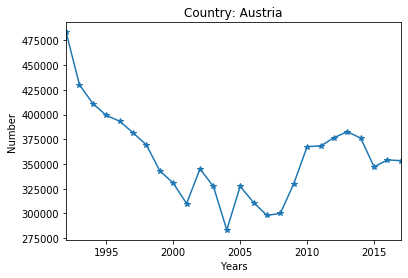

In [21]:
@interact
def show_beehives_for_country(country=big_decrease2017):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1992, 2017)

In [22]:
print(*big_decrease2017, sep = ", ")  

Austria, Egypt, France, Germany, Italy, Kenya, Mexico, Morocco, Russian Federation, Switzerland, United States of America


These are the countries with a big decrease again. We notice that for the longterm trend the number of countries having a high percentage loss decreased. Mostly bigger countries struggle by loosing a high absolute  value of beehives. But looking into the percentage difference only Italy occurs loosing a higher percentage over 66%.

In [23]:
beehives_bigDecrease = beehives[beehives['Area'].isin(big_decrease2017)]

In [24]:
beehives_bigDecrease

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
6229,11,Austria,1181,Beehives,5114,Stocks,1961,1961,No,466619.0,NaN
6230,11,Austria,1181,Beehives,5114,Stocks,1962,1962,No,448670.0,NaN
6231,11,Austria,1181,Beehives,5114,Stocks,1963,1963,No,437232.0,NaN
6232,11,Austria,1181,Beehives,5114,Stocks,1964,1964,No,421750.0,NaN
6233,11,Austria,1181,Beehives,5114,Stocks,1965,1965,No,419560.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
128894,231,United States of America,1181,Beehives,5114,Stocks,2013,2013,No,2640000.0,NaN
128895,231,United States of America,1181,Beehives,5114,Stocks,2014,2014,No,2740000.0,NaN
128896,231,United States of America,1181,Beehives,5114,Stocks,2015,2015,No,2660000.0,NaN
128897,231,United States of America,1181,Beehives,5114,Stocks,2016,2016,No,2775000.0,NaN


We can see the trend is continuing until 2017.  

## And what about increasing countries?

In [25]:
count_increasingNumber = 0
big_increase = []
for country in countries:
    try:
        sm1 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 1992)]['Value'])
        sm2 = int(beehives_countries.loc[(beehives_countries['Area'] == country) & (beehives_countries['Year'] == 2017)]['Value'])
        if sm2/sm1 > 1:
            count_increasingNumber += 1
#         if sm2-sm1>100000:
        if ((sm2/sm1)*100)>300 or sm2-sm1>200000:

            print(country)
            print("Ratio 2017/1992: %.2f%%" % ((sm2/sm1)*100))
            print("Number of Beehives in 1992: %d" % sm1)
            print("Number of Beehives in 2017: %d" % sm2)
            print("------------------")
            big_increase.append(country)
    except:
        continue
print("The number of beehives in the period from 1992-2017 increased in %s of %s countries." % (count_increasingNumber, len(countries)))

Albania
Ratio 2017/1992: 801.00%
Number of Beehives in 1992: 36200
Number of Beehives in 2017: 289962
------------------
Algeria
Ratio 2017/1992: 236.71%
Number of Beehives in 1992: 175000
Number of Beehives in 2017: 414244
------------------
Argentina
Ratio 2017/1992: 187.69%
Number of Beehives in 1992: 1600000
Number of Beehives in 2017: 3003036
------------------
Azerbaijan
Ratio 2017/1992: 417.97%
Number of Beehives in 1992: 65000
Number of Beehives in 2017: 271682
------------------
Bosnia and Herzegovina
Ratio 2017/1992: 941.16%
Number of Beehives in 1992: 43000
Number of Beehives in 2017: 404698
------------------
Bulgaria
Ratio 2017/1992: 152.80%
Number of Beehives in 1992: 493540
Number of Beehives in 2017: 754105
------------------
Central African Republic
Ratio 2017/1992: 129.61%
Number of Beehives in 1992: 1284000
Number of Beehives in 2017: 1664185
------------------
China
Ratio 2017/1992: 118.91%
Number of Beehives in 1992: 7700420
Number of Beehives in 2017: 9156882
----

Notice: There is a difference in the total number countries. This is due to newcomers who were not considered a country in 1992. For example 'Serbia and Montenegro' split to 'Serbia' and 'Montenegro'.  

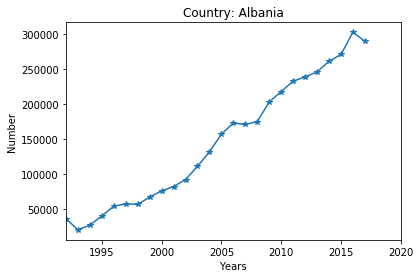

In [26]:
@interact
def show_beehives_for_country(country=big_increase):
    beehives_country=beehives_countries.loc[beehives_countries['Area']==country]
    
    plt.plot(beehives_country['Year'],beehives_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1992, 2020)

Looking at these plots we can clearly observe a lot of countries having a growing bee population. More than countries decreasing.  
We can also observe the countries are not specific to one continent but rather include different continents and areas. 


## Let us plot the continents

Let us no take a step back and look from a higher perspective on continents.  

We saw bees are increasing around the world. Is this also true for every continent?

We first draw a stacked boxplot and continue to look at each country in an interactive plot. 

In [27]:
beehives_continents.loc[beehives_continents['Year'] == 2017].sort_values('Value', ascending=False)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
149488,5300,Asia,1181,Beehives,5114,Stocks,2017,2017,No,42372690.0,A
155293,5400,Europe,1181,Beehives,5114,Stocks,2017,2017,No,18764349.0,A
138489,5100,Africa,1181,Beehives,5114,Stocks,2017,2017,No,17507222.0,A
144531,5200,Americas,1181,Beehives,5114,Stocks,2017,2017,No,11139203.0,A
160449,5500,Oceania,1181,Beehives,5114,Stocks,2017,2017,No,1216267.0,A


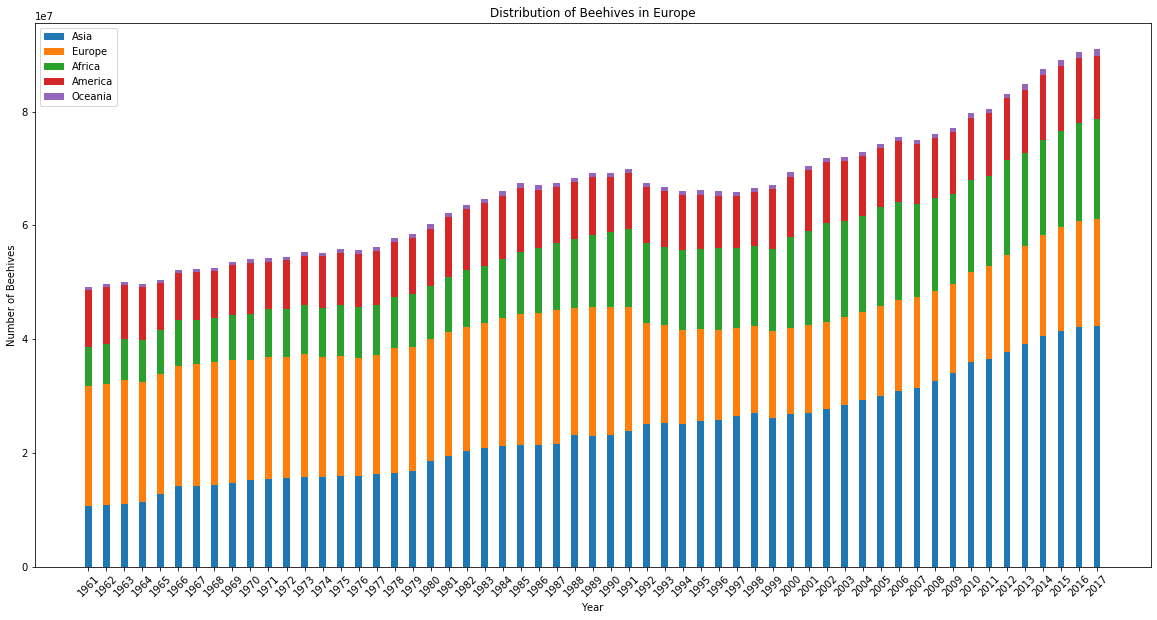

In [28]:
N = len(beehives_continents[beehives_continents['Area'] == 'Africa']['Value'])
africa = np.array(beehives_continents[beehives_continents['Area'] == 'Africa']['Value'])
europe = np.array(beehives_continents[beehives_continents['Area'] == 'Europe']['Value'])
america = np.array(beehives_continents[beehives_continents['Area'] == 'Americas']['Value'])
oceania = np.array(beehives_continents[beehives_continents['Area'] == 'Oceania']['Value'])
asia = np.array(beehives_continents[beehives_continents['Area'] == 'Asia']['Value'])

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(20,10))

p1 = plt.bar(ind, asia, width)
p2 = plt.bar(ind, europe, width, bottom=asia)
p3 = plt.bar(ind, africa, width, bottom=europe+asia)
p4 = plt.bar(ind, america, width, bottom=asia+europe+africa)
p5 = plt.bar(ind, oceania, width, bottom=asia+america+europe+africa)
plt.ylabel('Number of Beehives')
plt.xlabel('Year')
plt.title('Distribution of Beehives in Europe')
plt.xticks(ind, (range(1961, 2018)), rotation=45)
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ('Asia', 'Europe', 'Africa', 'America', 'Oceania'))

plt.show()

The plot reveals a lot about the distribution. We can observe that Asia on top is the biggest contributor of beehives, followed by a declining europe and an increasing Africa. America seems to be very stable while oceania is only responsible for a fairly small amount of beehives.  
We further look into the curves more in detail. We also see a big drop in europe. Which could be responsible for the sudden drop in the world.  
In fact Europe was the continent with the biggest bee population before the drop.  

We will look more deeply into the continents change ove time by plotting their distribution individually. 

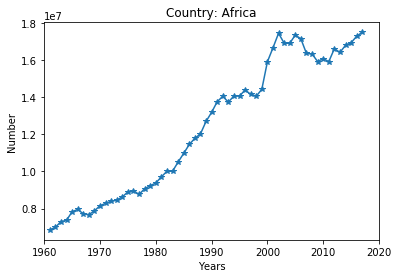

In [29]:
@interact
def show_beehives_for_country(continent=continents):
    beehives_continent=beehives_continents.loc[beehives_continents['Area']==continent]
    
    plt.plot(beehives_continent['Year'],beehives_continent['Value'],'-*')
    plt.title('Country: '+continent)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1960, 2020)

Looking at the plots individually we observe **Africa** is increasing it's beehives population as well as **Asia**. **Oceania** has a huge increase of beehives from 2012 to 2013, and from 2016 to 2017, we expect more to come.  
**America** and **Europe** have an unproportional declining population between 1990 and 2000. America recovered again while Europe still lacks behind it's pre 1990 value. 


In [30]:
# beehives_continents.loc[(beehives_continents['Area'] == 'Europe') & ~(beehives_continents['Year'] < 1985) & ~(beehives_continents['Year'] > 1998)]

## Conclusion

Looking at the data we see that countries that have a lot of bees are increasing there effort in growing the population. While other western countries (Germany, Italy, France, Switzerland, Austria and USA) find themselves in a situation of decreasing population.  

## Let us now also take a quick look on the 10 countries with the biggest beehives population in 2017

In [31]:
beehives_countries[beehives_countries['Year'] == 2017].sort_values('Value', ascending=False)[['Area','Value']].head(10)

,Area,Value
59382,India,12763684.0
24658,China,9156882.0
124390,Turkey,7796666.0
60864,Iran (Islamic Republic of),7271825.0
42356,Ethiopia,6139990.0
103336,Russian Federation,3349976.0
4103,Argentina,3003036.0
128271,United Republic of Tanzania,2998785.0
114105,Spain,2904971.0
128898,United States of America,2669000.0


Looking at the top ten we can see that they are spread around the world. With this we mean there are contributors in Asia, Europe, America and Africa. Only Oceania is missing. 

In [32]:
topTenContributors = beehives_countries[beehives_countries['Year'] == 2017].sort_values('Value', ascending=False)['Value'].head(10).sum()
worldPopulationBeehives = int(beehives_world[beehives_world['Year'] == 2017].Value)
ratioTopTenWorld = topTenContributors/worldPopulationBeehives
print("Here we can observe that our top ten contributors are responsible for %s%% of the worlds population of beehives, which is %s in total" % (ratioTopTenWorld, worldPopulationBeehives))

Here we can observe that our top ten contributors are responsible for 0.637966892868803% of the worlds population of beehives, which is 90999730 in total


Let us now give some contribution to the smaller countries which support the beehives population as well. Therefore we add a column that is dividing the total number of beehives in the country divided by the estimate population. 

In [33]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Let us just check our format.

In [34]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


We saw some differently spelled data, which we corrected in order to have correct the same names of countries.

In [35]:
beehives_perPopulation = beehives_countries.copy() 
beehives_perPopulation = beehives_perPopulation.replace({'Russian Federation': 'Russia', 'Bosnia and Herzegovina': 'Bosnia and Herz.', 'Belgium-Luxembourg': 'Luxembourg', 'Bolivia (Plurinational State of)':'Bolivia', 'Central African Republic':'Central African Rep.', 'China, Taiwan Province of': 'Taiwan', 'Dominican Republic': 'Dominican Rep.', 'Ethiopia PDR': 'Ethiopia', 'Iran (Islamic Republic of)':'Iran', 'Syrian Arab Republic':'Syria', 'North Macedonia':'Macedonia', 'Venezuela (Bolivarian Republic of)': 'Venezuela', 'Viet Nam':'Vietnam', 'Czechoslovakia':'Czechia'})
beehives_perPopulation = world.set_index('name').join(beehives_perPopulation.set_index('Area'))

In [36]:
beehives_perPopulation['Per_Population'] = beehives_perPopulation['Value']/beehives_perPopulation['pop_est']

In [37]:
beehives_perPopulation['Area'] = beehives_perPopulation.index

In [38]:
beehives_perPopulation[beehives_perPopulation['Year'] == 2017].sort_values('Per_Population', ascending=False)[['Value']].head(10)

,Value
Central African Rep.,1664185.0
New Zealand,820000.0
Greece,1561498.0
Uruguay,480154.0
Montenegro,80620.0
Serbia,849280.0
Croatia,486271.0
Bulgaria,754105.0
Bosnia and Herz.,404698.0
Turkey,7796666.0


Now we see different countries and there is New Zealand. One of the Oceanian countries. Interestingly 7 out of 10 countries are considered to be in eastern europe. 

## EU27 Distribution

In [39]:
eu27 = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta', 'Czechia', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 'Slovakia', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'United Kingdom']

beehives_eu27 = beehives[beehives['Area'].isin(eu27)]
beehives_eu27_2017 = beehives_eu27.loc[beehives_eu27['Year']==2017]
beehives_eu27_2017 = beehives_eu27_2017.dropna(subset=['Value'])



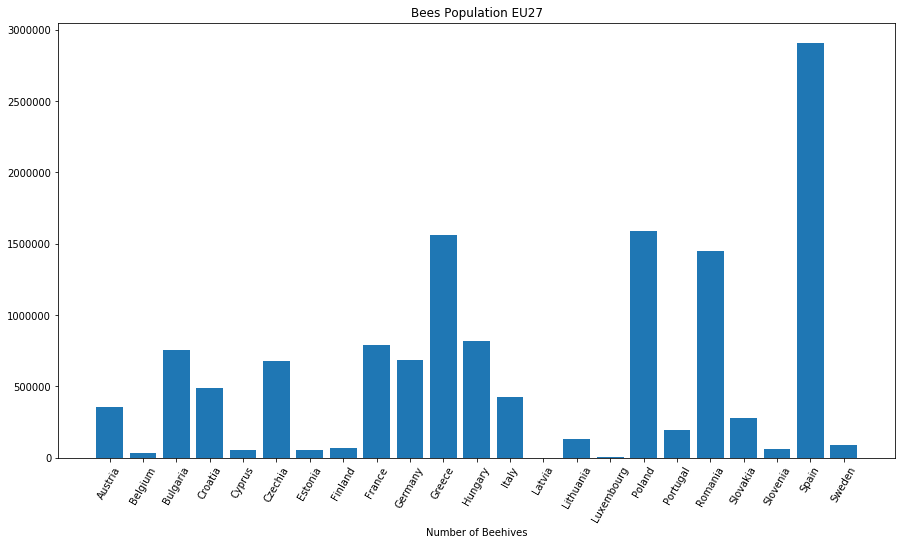

In [40]:
plt.figure(figsize=(15,8))
plt.bar(beehives_eu27_2017['Area'], beehives_eu27_2017['Value'])
plt.title('Bees Population EU27')
plt.xlabel('Number of Beehives')
plt.xticks(rotation=60);

Looking at the dataset we observe Spain, Greece and Poland to have the three biggest bees population. 

## Let us now for aesthetic reasons plot a map 

There we can reuse our beehives_perPopulation DataFrame

In [41]:
years = beehives_perPopulation.Year.unique()
years = years[~np.isnan(years)]
years = beehives_perPopulation.Year.unique()
years = years[~np.isnan(years)]
beehives_perPopulation.Year = beehives_perPopulation.Year.fillna(0)
beehives_perPopulation.Year = beehives_perPopulation.Year.astype(int)
beehives_perPopulation.Value = beehives_perPopulation.Value.fillna(0)

In [42]:
beehives_perPopulation.Year.loc[beehives_perPopulation.Year == 0]
newDF = beehives_perPopulation.loc[beehives_perPopulation['Year'] == 0].copy()
for year in years: 
    newDF.Year = year
    beehives_perPopulation = beehives_perPopulation.append(newDF, ignore_index = True)

In [43]:
mapPlot_beehives = pd.DataFrame({})

perc =[.10, .20,.30,.40,.50,.60,.70,.80,.90] 
for year in years:
    beehives_splitted_inYears = beehives_perPopulation.loc[beehives_perPopulation['Year']==year].copy()
    beehives_splitted_inYears['categorize value'] = np.where(beehives_splitted_inYears['Value']==0, 0, \
                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], 1, \
                                                np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], 2, \
                                                         np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], 3, \
                                                                  np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], 4, \
                                                                           np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], 5, \
                                                                                    np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], 6, \
                                                                                             np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], 7, \
                                                                                                      np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], 8, \
                                                                                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], 9, 10))))))))))
    beehives_splitted_inYears['value percentile'] = np.where(beehives_splitted_inYears['Value']==0, 0, \
                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['10%'], \
                                                np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['20%'], \
                                                         np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['30%'], \
                                                                  np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['40%'], \
                                                                           np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['50%'], \
                                                                                    np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['60%'], \
                                                                                             np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['70%'], \
                                                                                                      np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['80%'], \
                                                                                                            np.where(beehives_splitted_inYears['Value']<=beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], beehives_splitted_inYears.mask(beehives_splitted_inYears.Value == 0).Value.describe(percentiles = perc)['90%'], beehives_splitted_inYears.Value.max()))))))))))
    mapPlot_beehives = mapPlot_beehives.append(beehives_splitted_inYears, ignore_index = True)

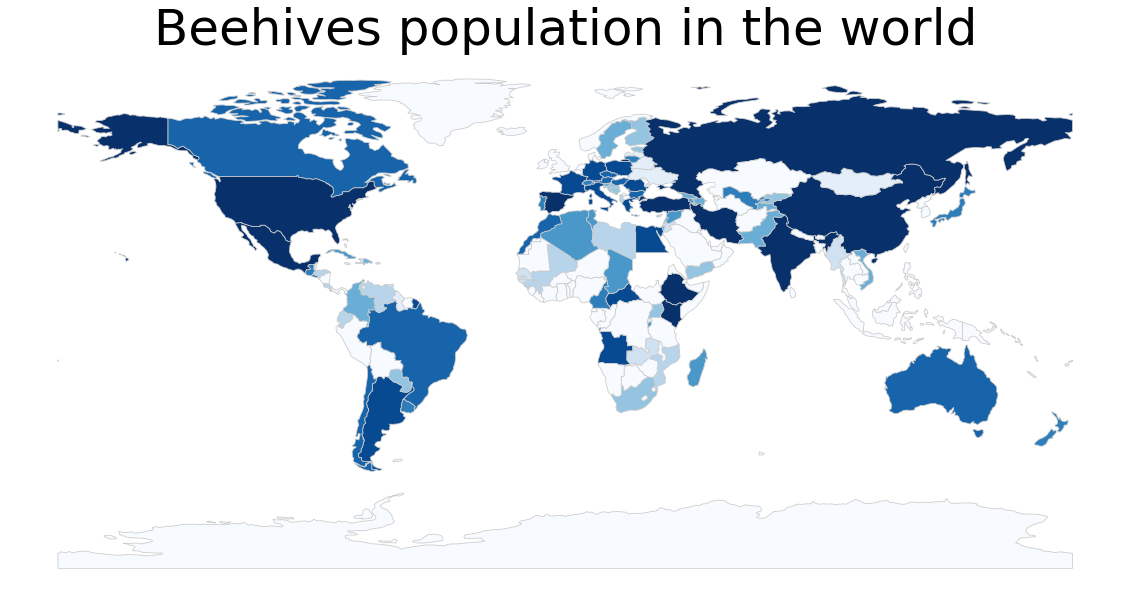

In [44]:
years = range(1992,2018)
@interact
def show_beehives_for_country(year=years):
    fig, ax = plt.subplots(1, figsize=(20, 12))
    mapPlot_beehives_Year=mapPlot_beehives.loc[mapPlot_beehives['Year']==year]

    mapPlot_beehives_Year.plot(column='categorize value',cmap='Blues', ax=ax, linewidth=0.8, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('Beehives population in the world', fontdict={'fontsize': '50', 'fontweight' : '3'})
    vmax = mapPlot_beehives_Year['value percentile'].max()
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    #sm._A = []
    #cbar = fig.colorbar(sm)


In [45]:
mapPlot_beehives.head()

,pop_est,continent,iso_a3,gdp_md_est,geometry,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Per_Population,Area,categorize value,value percentile
0,3047987,Europe,ALB,33900.0,"POLYGON ((21.02004 40.84273, 20.99999 40.58000...",3.0,1181.0,Beehives,5114.0,Stocks,1961.0,1961.0,No,95100.0,NaN,0.031201,Albania,5,100000.0
1,40969443,Africa,DZA,609400.0,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948...",4.0,1181.0,Beehives,5114.0,Stocks,1961.0,1961.0,No,100000.0,*,0.002441,Algeria,5,100000.0
2,29310273,Africa,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",7.0,1181.0,Beehives,5114.0,Stocks,1961.0,1961.0,No,1000000.0,F,0.034118,Angola,9,1040800.0
3,44293293,South America,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",9.0,1181.0,Beehives,5114.0,Stocks,1961.0,1961.0,No,650000.0,NaN,0.014675,Argentina,9,1040800.0
4,23232413,Oceania,AUS,1189000.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",10.0,1181.0,Beehives,5114.0,Stocks,1961.0,1961.0,No,323447.0,NaN,0.013922,Australia,7,344764.0


## We found out that pesticides are one of the worst killers for bees. These include Organo-phosphates, Carbamates and Pyrethroids. They are highly toxic.

In [46]:
pesticides = pd.read_csv('data/Inputs_Pesticides_Use_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')

Let us now first again preprocess the data, filter for our countries and then take a closer look if there is a correlation.

In [47]:
pesticides.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1990,1990,tonnes,121.0,A
1,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1991,1991,tonnes,121.0,A
2,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1992,1992,tonnes,121.0,A
3,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1993,1993,tonnes,121.0,A
4,3,Albania,1357,Pesticides (total),5157,Agricultural Use,1994,1994,tonnes,201.0,A


In [48]:
pesticides.Item.unique()[range(5)]

array(['Pesticides (total)', 'Insecticides',
       'Insecticides \x96 Chlorinated Hydrocarbons',
       'Insecticides \x96 Organo-phosphates',
       'Insecticides \x96 Carbamates'], dtype=object)

Oh! Our data looks bad formatted. Let us first fix this.

In [49]:
pesticides['Item'] = pesticides['Item'].str.replace('\x96', '-')

In [50]:
pesticides.Item.unique()[range(5)]

array(['Pesticides (total)', 'Insecticides',
       'Insecticides - Chlorinated Hydrocarbons',
       'Insecticides - Organo-phosphates', 'Insecticides - Carbamates'],
      dtype=object)

Now this looks better.

For us interesting are Organo-phosphates, Carbamates and Pyrethroids as well as the total use in the countries where bees are decreasing.

In [51]:
pesticides_total = pesticides.loc[(pesticides['Item'] == 'Pesticides (total)') & (pesticides['Area'].isin(big_decrease))]
pesticides_total_world = pesticides.loc[(pesticides['Item'] == 'Pesticides (total)') & (pesticides['Area'] == 'World')]

In [52]:
pesticides_organoPhosphates = pesticides.loc[(pesticides['Item'] == 'Insecticides - Organo-phosphates') & (pesticides['Area'].isin(big_decrease))]
pesticides_carbamates = pesticides.loc[(pesticides['Item'] == 'Insecticides - Carbamates') & (pesticides['Area'].isin(big_decrease))]
pesticides_pyrethroids = pesticides.loc[(pesticides['Item'] == 'Insecticides - Pyrethroids') & (pesticides['Area'].isin(big_decrease))]

Let us now first see how the use of pesticides across the world is. Unfortunately we only have data from 1990 to 2017.

(1990, 2020)

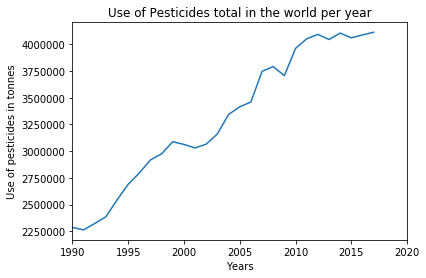

In [53]:
plt.plot(pesticides_total_world['Year'], pesticides_total_world['Value'])
plt.title('Use of Pesticides total in the world per year')
plt.xlabel('Years')
plt.ylabel('Use of pesticides in tonnes')
plt.xlim(1990, 2020)

### Here we see an increasing number of pesticides throughout the world. How is the increase considered only the toxic pesticides?

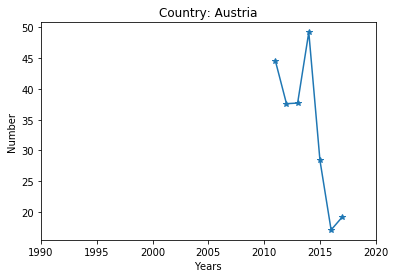

In [54]:
@interact
def show_beehives_for_country(country=big_decrease2017):
    pesticides_organoPhosphates_country=pesticides_organoPhosphates.loc[pesticides_organoPhosphates['Area']==country]
    plt.plot(pesticides_organoPhosphates_country['Year'],pesticides_organoPhosphates_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

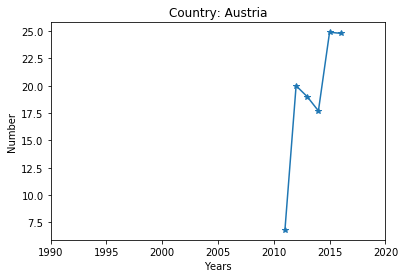

In [55]:
@interact
def show_beehives_for_country(country=big_decrease2017):
    pesticides_carbamates_country=pesticides_carbamates.loc[pesticides_carbamates['Area']==country]
    plt.plot(pesticides_carbamates_country['Year'],pesticides_carbamates_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

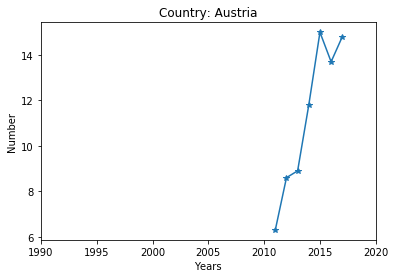

In [56]:
@interact
def show_beehives_for_country(country=big_decrease2017):
    pesticides_pyrethroids_country=pesticides_pyrethroids.loc[pesticides_pyrethroids['Area']==country]
    plt.plot(pesticides_pyrethroids_country['Year'],pesticides_pyrethroids_country['Value'],'-*')
    plt.title('Country: '+country)
    plt.xlabel('Years')
    plt.ylabel('Number')
    plt.xlim(1990, 2020)

This data does look hard to obtain since a lot of countries are not covered in this dataset. However some are. From looking at the three different pesticides we see that Pyrethroids are increasing in Austria, France, Germany, France, Italy and Switzerland. The two other pesticides decrease.

In [57]:
joined = beehives.loc[beehives["Area"].isin(countries)]\
                 .set_index(["Area","Year"])\
                 .join(pesticides_total.loc[pesticides_total["Area"].isin(countries)].set_index(["Area","Year"]), lsuffix='_beehives', rsuffix='_pesticides')
joined = joined.reset_index()
joined = joined[['Area', 'Year', 'Value_beehives', 'Value_pesticides']]

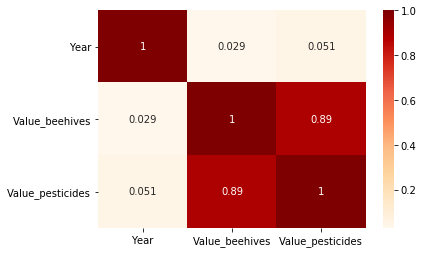

In [58]:
import seaborn as sns
pearson_corr = joined.corr("pearson")
sns.heatmap(pearson_corr, fmt='.2g',annot=True, cmap="OrRd");

## Looking into pesticides toxic for beehives

In [59]:
toxic_pesticides = ['Insecticides - Organo-phosphates', 'Insecticides - Carbamates', 'Insecticides - Pyrethroids']
pesticides_toxic = pesticides.loc[(pesticides['Item'].isin(toxic_pesticides)) & (pesticides['Area'].isin(countries))]

In [60]:
joined = beehives.loc[beehives["Area"].isin(countries)]\
                 .set_index(["Area","Year"])\
                 .join(pesticides_toxic.loc[pesticides_toxic["Area"].isin(countries)].set_index(["Area","Year"]), lsuffix='_beehives', rsuffix='_pesticides_toxic')
joined = joined.reset_index()
joined = joined[['Area', 'Year', 'Value_beehives', 'Value_pesticides_toxic']]

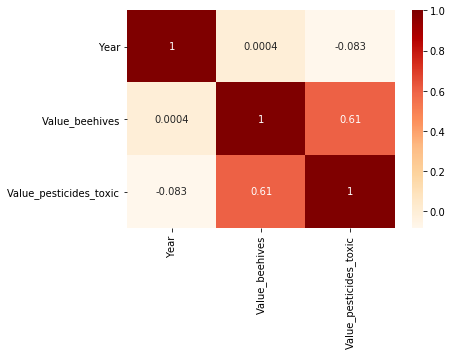

In [61]:
import seaborn as sns
pearson_corr = joined.corr("pearson")
sns.heatmap(pearson_corr, fmt='.2g',annot=True, cmap="OrRd");

### But what are Pyrethroids and why is the number increasing this much? 

Insecticides in general are a substance to kill insects. Some of them are widely regarded as safe to the human but '2250 times more toxic to insects'. [https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6174339/]. One of those is the Pyrethroid. It is recommendd for 'in-home insect control' to keep the house clean of insects and so widely spread. They can also be found in different products, like mosquito repellents, soap for pets or in our sprinkled in ones garden. [https://www.theverge.com/2014/2/19/5423480/popular-poison-pyrethroid-health-risks].
The effects of pesticides on bees can weaken their immune system which makes them less productive and leads to a decline of bees population.

# An interactive plot of percentage changes during the years

In [62]:
selected_countries = ['Austria', 'Bulgaria', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland', 'Canada', 'Mexico', 'United States of America']

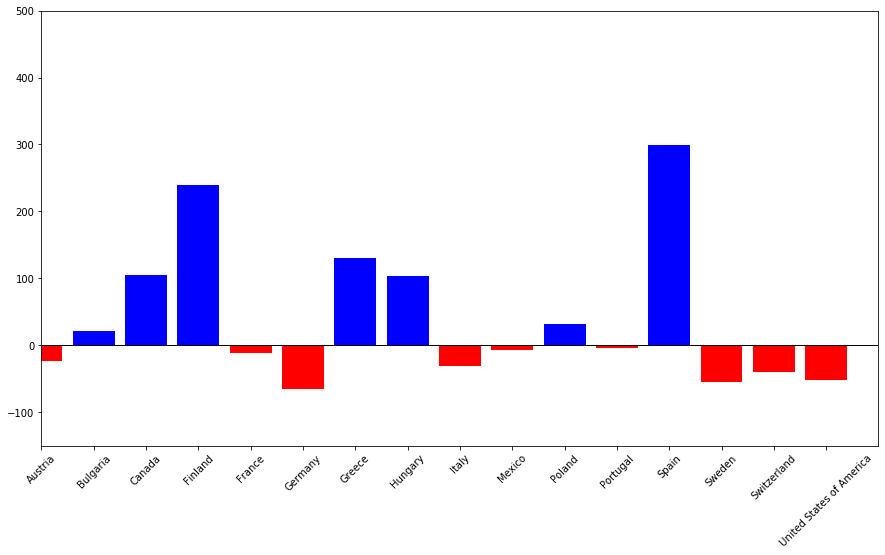

In [63]:
beehives_selected = beehives.loc[beehives.Area.isin(selected_countries)]

@interact(Starting_Year=(1961, 2016, 1), End_Year=(1962, 2017, 1))
def show_beehives_for_country(Starting_Year=1961, End_Year=2017):
    
    old = np.array(beehives_selected.loc[beehives_selected.Year == Starting_Year, 'Value'])
    new = np.array(beehives_selected.loc[beehives_selected.Year == End_Year, 'Value'])
    
    res = pd.DataFrame((new - old) / old) * 100
    res.index = beehives_selected.Area.unique()
    res.columns = ['Value']
    
    fig = plt.figure(figsize=(15, 8))
    plt.axis([0, len(selected_countries), -150, 500])
    plt.bar(x = res.index, height = res.Value, color=(res['Value'] > 0).map({True: 'b', False: 'r'}))
    plt.xticks(rotation=45)
    plt.axhline(y = 0,linewidth = 1, color = 'k');

Here we have a plot of percentage changes for some selected countries during the years. You can use the sliders to change years between which the percentage change is computed.

# Looking at the correlation of the forest land and beehives  

In [64]:
beehives_countries

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
684,3,Albania,1181,Beehives,5114,Stocks,1961,1961,No,95100.0,NaN
685,3,Albania,1181,Beehives,5114,Stocks,1962,1962,No,92800.0,NaN
686,3,Albania,1181,Beehives,5114,Stocks,1963,1963,No,83500.0,NaN
687,3,Albania,1181,Beehives,5114,Stocks,1964,1964,No,96500.0,NaN
688,3,Albania,1181,Beehives,5114,Stocks,1965,1965,No,109800.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
135919,251,Zambia,1181,Beehives,5114,Stocks,2013,2013,No,57000.0,F
135920,251,Zambia,1181,Beehives,5114,Stocks,2014,2014,No,57000.0,F
135921,251,Zambia,1181,Beehives,5114,Stocks,2015,2015,No,57194.0,Im
135922,251,Zambia,1181,Beehives,5114,Stocks,2016,2016,No,59696.0,Im


In [65]:
land_use = pd.read_csv('data/Inputs_LandUse_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
#land_use_countries = land_use[land_use['Area'].isin(countries)]
#land_use_continents = land_use[land_use['Area'].isin(continents)]

Load datasets

In [66]:
# Forest land, Country Area, Agricultural land
forest_land = land_use.loc[land_use['Item'] == 'Forest land'].copy()
agricultural_land = land_use.loc[land_use['Item'] == 'Agricultural land'].copy()
country_land = land_use.loc[land_use['Item'] == 'Country area'].copy()
inland_waters = land_use.loc[land_use['Item'] == 'Inland waters'].copy()

forest_land.drop(forest_land[forest_land["Element"] == "Carbon stock in living biomass"].index, inplace = True)

First look at the data

In [67]:
country_land.head(5)

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6600,Country area,5110,Area,1961,1961,1000 ha,65286.0,W
1,2,Afghanistan,6600,Country area,5110,Area,1962,1962,1000 ha,65286.0,W
2,2,Afghanistan,6600,Country area,5110,Area,1963,1963,1000 ha,65286.0,W
3,2,Afghanistan,6600,Country area,5110,Area,1964,1964,1000 ha,65286.0,W
4,2,Afghanistan,6600,Country area,5110,Area,1965,1965,1000 ha,65286.0,W


Calculating ratio for forest land, agricultural land and beehives. These quantities are defined as:

$$ Ratio_{forest} = \frac{ForestArea}{TotalArea} $$

$$ Ratio_{agriculture} = \frac{AgriculturalArea}{TotalArea} $$

$$ Ratio_{beehives} = \frac{BeehivesNumber}{TotalArea} $$

In [ ]:
years = range(1960, 2018)
all_areas = countries + continents + ["World"]

for country in all_areas:
    #print("country: ", country)
    for year in years:
        # calculate and insert ratio in corresponding dataframe(for each country and year)
        try:
            country_elem = country_land.loc[(country_land["Area"] == country) & (country_land["Year"] == year), "Value"].values[0]
            try:
                forest_elem = forest_land.loc[(forest_land["Area"] == country) & (forest_land["Year"] == year), "Value"].values[0]
                forest_ratio = forest_elem / country_elem
                forest_land.loc[(forest_land["Area"] == country) & (forest_land["Year"] == year),"Ratio"] = forest_ratio
            except:
                pass
            try:
                agricultural_elem = agricultural_land.loc[(agricultural_land["Area"] == country) & (agricultural_land["Year"] == year), "Value"].values[0]
                agricultural_ratio = agricultural_elem / country_elem
                agricultural_land.loc[(agricultural_land["Area"] == country) & (agricultural_land["Year"] == year),"Ratio"] = agricultural_ratio
            except:
                pass
            try:
                waters_elem = inland_waters.loc[(inland_waters["Area"] == country) & (inland_waters["Year"] == year), "Value"].values[0]
                waters_ratio = waters_elem / country_elem
                inland_waters.loc[(inland_waters["Area"] == country) & (inland_waters["Year"] == year),"Ratio"] = waters_ratio
            except:
                pass
            try:
                beehives_elem = beehives.loc[(beehives["Area"] == country) & (beehives["Year"] == year), "Value"].values[0]
                beehives_ratio = beehives_elem / country_elem
                beehives.loc[(beehives["Area"] == country) & (beehives["Year"] == year),"Ratio"] = beehives_ratio
            except:
                pass
        except:
            pass

Visualizing correlation between forest ratio and beehives number, in countries and continents.

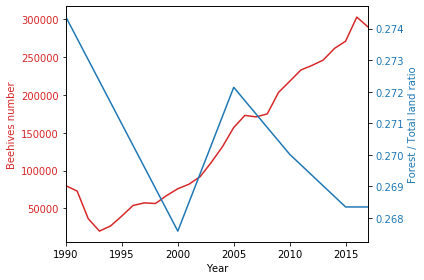

In [69]:
@interact
def plot_agricultural_land(area=countries):
    try:
        #agricultural_tmp = agricultural_land[(agricultural_land["Country or Area"] == area) & (agricultural_land["Element"] == "Area")][["Value","Year"]]
        forest_tmp = forest_land[forest_land["Area"] == area][["Ratio","Year"]]
        beehives_tmp = beehives[beehives["Area"] == area][["Value","Year"]]
    
        fig, ax1 = plt.subplots()
        
        color = 'tab:red'
        ax1.set_xlabel('Years')
        ax1.set_ylabel('Beehives number', color=color)
        beehives_tmp.plot(ax=ax1, x="Year", y="Value", color=color, label="Beehives number")
        ax1.tick_params(axis='y', labelcolor=color)

        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

        color = 'tab:blue'
        ax2.set_ylabel('Forest / Total land ratio', color=color)  # we already handled the x-label with ax1
        forest_tmp.plot(ax=ax2, x="Year", y="Ratio", color=color, label="Forest ratio")
        ax2.tick_params(axis='y', labelcolor=color)
        ax1.get_legend().remove()
        ax2.get_legend().remove()
        fig.tight_layout()  # otherwise the right y-label is slightly clipped
        plt.show()
    except:
        pass

## Forests analysis

In [70]:
forest_land.loc[(forest_land["Year"] == 2017) & (forest_land["Area"] == "World"), ["Area", "Value", "Ratio"]]

,Area,Value,Ratio
168004,World,3999133.622,0.296539


This means that ~30% of the world land surface area is covered by forests.
Visualizing forests area per continent. 

Visualizing forests area per continent. 

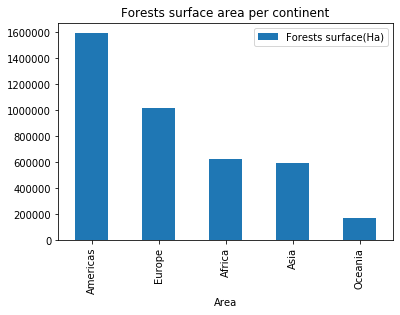

In [71]:
forest_land.sort_values(by=["Value"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(continents)), ["Area", "Value"]]\
           .plot.bar(x="Area",y="Value", label="Forests surface(Ha)", title="Forests surface area per continent")

In [72]:
forest_land.sort_values(by=["Ratio"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(continents)), ["Area", "Ratio"]]

,Area,Ratio
181926,Europe,0.435271
173543,Americas,0.391787
168798,Africa,0.205848
185896,Oceania,0.202680
177506,Asia,0.185431


### Forests analysis per country

Plotting countries with more forests.

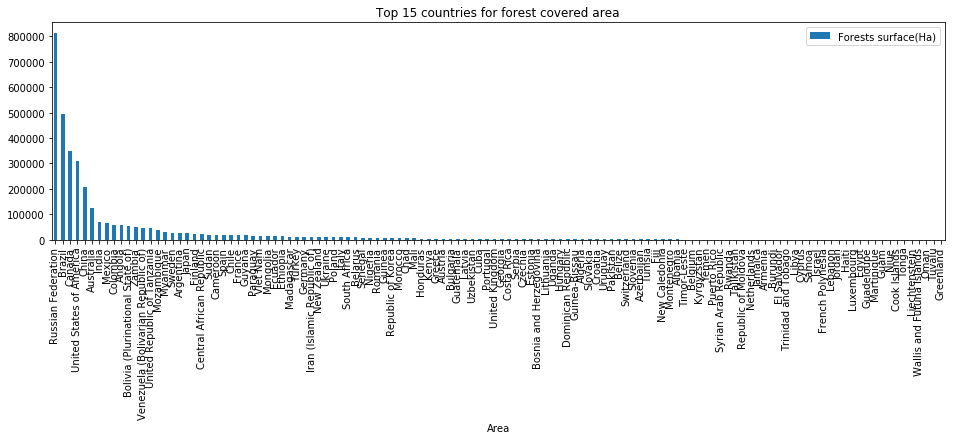

In [73]:
forest_land.sort_values(by=["Value"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(countries)), ["Area", "Value"]]\
           .plot.bar(x="Area", y="Value", title="Top 15 countries for forest covered area", label="Forests surface(Ha)", figsize=(16,4))

Plotting the total surface area in each country. we can observe a long tailed distribution.

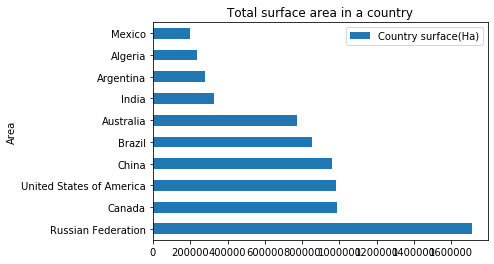

In [74]:
country_land.sort_values(by=["Value"], ascending=False)\
           .loc[(country_land["Year"] == 2017) & (country_land["Area"].isin(countries)), ["Area", "Value"]]\
           .head(10)\
           .plot.barh(x="Area", y="Value", title="Total surface area in a country", label="Country surface(Ha)")

It seems that Russia has almost the double of forests than any other country, but also the double in total area.
We proceed by analysing the ratio between the area covered by forests and the total available surface.

In [75]:
forest_land.sort_values(by=["Ratio"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(countries)), ["Area","Ratio"]]\
           .head(10)

,Area,Ratio
67185,Guyana,0.768758
110275,Niue,0.696154
78503,Japan,0.660317
53999,Finland,0.656463
166436,Zambia,0.646218
36192,Cook Islands,0.629167
144387,Sweden,0.627428
123805,Republic of Korea,0.616182
137940,Slovenia,0.609375
131489,Samoa,0.602113


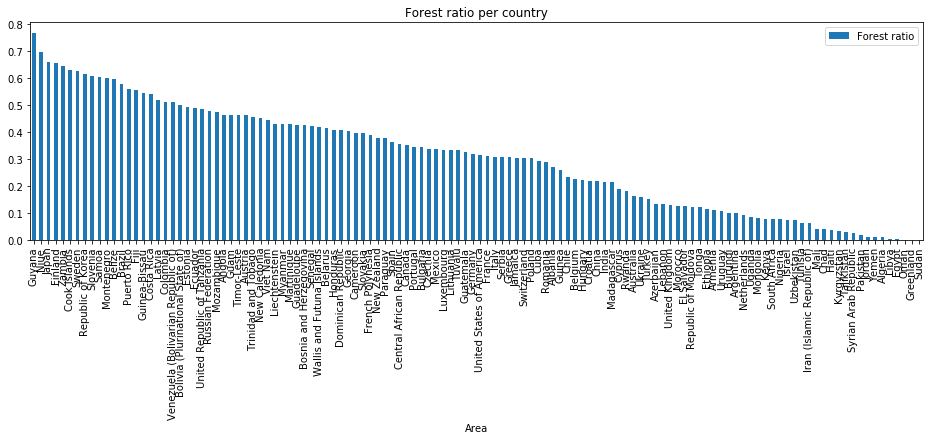

In [76]:
forest_land.sort_values(by=["Ratio"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(countries)), ["Area", "Ratio"]]\
           .plot.bar(x="Area", y="Ratio", title="Forest ratio per country", label="Forest ratio", figsize=(16,4))

### Discover trends in number of bees

In [77]:
forest_land.sort_values(by=["Ratio"], ascending=False)\
           .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(big_decrease2017)), ["Area","Ratio"]]\

,Area,Ratio
126636,Russian Federation,0.476616
8729,Austria,0.461260
97453,Mexico,0.336188
59395,Germany,0.319341
158803,United States of America,0.315409
54908,France,0.309405
76876,Italy,0.308522
145312,Switzerland,0.303703
100271,Morocco,0.126122
80690,Kenya,0.076038


In [78]:
forest_land.sort_values(by=["Ratio"], ascending=False)\
            .loc[(forest_land["Year"] == 2017) & (forest_land["Area"].isin(big_increase)), ["Area","Ratio"]]\
            .head(10)

,Area,Ratio
123805,Republic of Korea,0.616182
53219,Fiji,0.556757
157966,United Republic of Tanzania,0.486224
106321,New Caledonia,0.451561
101874,Myanmar,0.429226
18066,Bosnia and Herzegovina,0.426674
134234,Senegal,0.420568
58617,Georgia,0.404935
107105,New Zealand,0.379216
141186,Spain,0.364036


This result doesn't confirm the fact highlighted before, but could it still be some correlation? Let's check Spearman and Pearson correlations.

In [79]:
joined = beehives.loc[beehives["Area"].isin(countries)]\
                 .set_index(["Area","Year"])\
                 .join(forest_land.loc[forest_land["Area"].isin(countries)].set_index(["Area","Year"]), lsuffix='_beehives', rsuffix='_forest')
joined = joined.reset_index()

In [80]:
joined = joined[['Area', 'Year', 'Value_beehives', 'Ratio_beehives', 'Value_forest', 'Ratio_forest']]

##### Pearson correlation

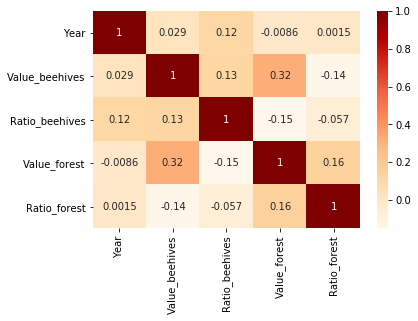

In [81]:
import seaborn as sns
pearson_corr = joined.corr("pearson")
sns.heatmap(pearson_corr, fmt='.2g',annot=True, cmap="OrRd");

We can see that we have some week correlation between forests surface area in a country and number of beehives in that country. 

The forest concentration is probably not the only factor that influence the number of beehives, but it could have an impact on it. 

Let's calculate the Pearson correlation for other factors that could have influence too, like agricultural land area and inland waters surface.

##### Analysis of agriculture and beehives correlation

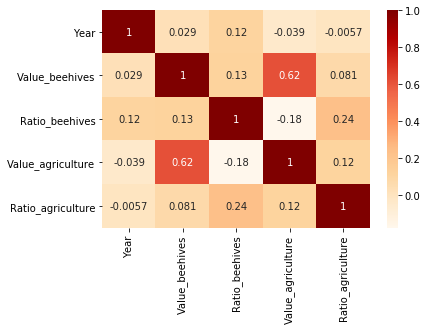

In [82]:
joined = beehives.loc[beehives["Area"].isin(countries)]\
                 .set_index(["Area","Year"])\
                 .join(agricultural_land.loc[agricultural_land["Area"].isin(countries)].set_index(["Area","Year"]), lsuffix='_beehives', rsuffix='_agriculture')
joined = joined.reset_index()

joined = joined[['Area', 'Year', 'Value_beehives', 'Ratio_beehives', 'Value_agriculture', 'Ratio_agriculture']]
spearman_corr = joined.corr("pearson")
sns.heatmap(spearman_corr, fmt='.2g',annot=True, cmap="OrRd");

It seems that we have a good correlation between the agricultural surface area and the number of beehives.

##### Analysis of inland water and beehives correlation

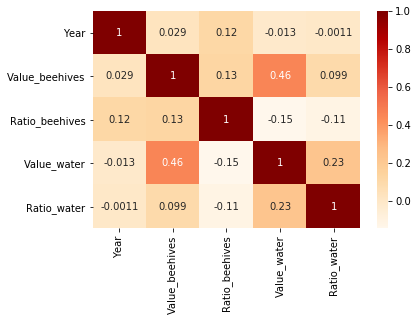

In [83]:
joined = beehives.loc[beehives["Area"].isin(countries)]\
                 .set_index(["Area","Year"])\
                 .join(inland_waters.loc[inland_waters["Area"].isin(countries)].set_index(["Area","Year"]), lsuffix='_beehives', rsuffix='_water')
joined = joined.reset_index()

joined = joined[['Area', 'Year', 'Value_beehives', 'Ratio_beehives', 'Value_water', 'Ratio_water']]
spearman_corr = joined.corr("pearson")
sns.heatmap(spearman_corr, fmt='.2g',annot=True, cmap="OrRd");

It seems that also here we have a good correlation between the inland water covered surface and the number of beehives.

### We feel like we need some data about colony losses, which this dataset doesn't provide

Colony loss disorder is an importan topic blabla...  
We found data for the US provided by USDA: https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Bee_and_Honey/  
The data is poorly formatted so we will have to do a lot of preprocessing

In [84]:
import csv

header = [['State', 'Colonies', 'Maximum', 'Lost', 'Percent lost', 'Added', 'Renovated', 'Percent renovated'],
            ['State', 'Mites', 'Parasites', 'Diseases', 'Pesticides', 'Other', 'Unknown']]

def create_dataframe(path, index):
    
    title = []
    data = []
    
    with open(path, encoding="utf8", errors='ignore') as input_file:
        reader = csv.reader(input_file)
        
        for cnt, row in enumerate(reader):
            
            if row[1] == 't':
                title.append(row)
                
            if row[1] == 'd':
                data.append(row[2:])

    date = title[1][-1].split('-')[-1]
    
    df = pd.DataFrame(data)
    df.columns = header[index]
    df['Date'] = pd.to_datetime(date)
    return df[df.State != '']

In [85]:
folder = 'data/Bees/'

files = ['BeeColonies-05-12-2016/hcny_p01_t005.csv', 'BeeColonies-05-12-2016/hcny_p02_t001.csv',
        'BeeColonies-05-12-2016/hcny_p03_t007.csv', 'BeeColonies-05-12-2016/hcny_p04_t008.csv',
         
        'BeeColonies-08-01-2017/hcny_p04_t005.csv', 'BeeColonies-08-01-2017/hcny_p05_t001.csv',
        'BeeColonies-08-01-2017/hcny_p06_t007.csv', 'BeeColonies-08-01-2017/hcny_p07_t008.csv',
         
        'BeeColonies-08-01-2018/hcny_p04_t005.csv', 'BeeColonies-08-01-2018/hcny_p05_t001.csv',
        'BeeColonies-08-01-2018/hcny_p06_t007.csv', 'BeeColonies-08-01-2018/hcny_p07_t008.csv',
         
        'BeeColonies-08-01-2019/hcny_p03_t005.csv', 'BeeColonies-08-01-2019/hcny_p04_t001.csv',
        'BeeColonies-08-01-2019/hcny_p05_t007.csv', 'BeeColonies-08-01-2019/hcny_p06_t008.csv',
        'BeeColonies-08-01-2019/hcny_p07_t011.csv']

files2 = ['BeeColonies-05-12-2016/hcny_p06_t002.csv', 'BeeColonies-05-12-2016/hcny_p07_t013.csv',
        'BeeColonies-05-12-2016/hcny_p08_t009.csv', 'BeeColonies-05-12-2016/hcny_p09_t010.csv',
         
        'BeeColonies-08-01-2017/hcny_p10_t002.csv', 'BeeColonies-08-01-2017/hcny_p11_t013.csv',
        'BeeColonies-08-01-2017/hcny_p12_t009.csv', 'BeeColonies-08-01-2017/hcny_p13_t010.csv',
         
        'BeeColonies-08-01-2018/hcny_p10_t002.csv', 'BeeColonies-08-01-2018/hcny_p11_t013.csv',
        'BeeColonies-08-01-2018/hcny_p12_t009.csv', 'BeeColonies-08-01-2018/hcny_p13_t010.csv',
         
        'BeeColonies-08-01-2019/hcny_p08_t002.csv', 'BeeColonies-08-01-2019/hcny_p09_t013.csv',
        'BeeColonies-08-01-2019/hcny_p10_t009.csv', 'BeeColonies-08-01-2019/hcny_p11_t010.csv',
        'BeeColonies-08-01-2019/hcny_p12_t012.csv']

In [86]:
colonies = pd.concat([create_dataframe(folder + file, index=0) for file in files], axis=0)
colonies = colonies.reset_index(drop=True)
colonies.replace(['(X)', '(Z)', '-'], 0, inplace=True)
colonies.iloc[:, 1:-1] = colonies.iloc[:, 1:-1].astype(int)
colonies

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
0,Alabama,7000,7000,1800,26,2800,250,4,2015-03-01
1,Arizona,35000,35000,4600,13,3400,2100,6,2015-03-01
2,Arkansas,13000,14000,1500,11,1200,90,1,2015-03-01
3,California,1440000,1690000,255000,15,250000,124000,7,2015-03-01
4,Colorado,3500,12500,1500,12,200,140,1,2015-03-01
...,...,...,...,...,...,...,...,...,...
794,West Virginia,5000,7000,1300,19,20,60,1,2019-03-01
795,Wisconsin,16500,17000,3700,22,580,100,1,2019-03-01
796,Wyoming,6500,9500,250,3,0,0,0,2019-03-01
797,Other States 5/,6070,6070,590,10,70,30,0,2019-03-01


In [87]:
colonies.loc[colonies.State == 'United States']

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
46,United States,2824610,0,500020,18,546980,270530,10,2015-03-01
93,United States,2849500,0,352860,12,661860,692850,24,2015-06-01
140,United States,3132880,0,457100,15,172990,303070,10,2015-09-01
187,United States,2874760,0,412380,14,117150,158790,6,2015-12-01
234,United States,2619940,0,416100,16,571880,245060,9,2016-03-01
281,United States,2801470,0,329820,12,736920,561160,20,2016-06-01
328,United States,3181180,0,397290,12,217320,282130,9,2016-09-01
375,United States,3032060,0,502350,17,124660,60390,2,2016-12-01
422,United States,2641090,0,398650,15,478240,241210,9,2017-03-01
469,United States,2694150,0,285590,11,613360,762550,28,2017-06-01


Although the data provided is very recent it is only for the interval 2015-2019

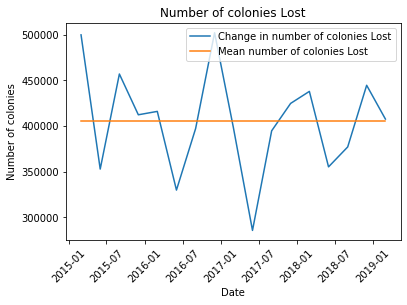

In [88]:
column = 'Lost'
state = colonies.loc[colonies.State == 'United States', ['Date', column]]
plt.plot(state.Date, state[column], label=f'Change in number of colonies {column}')
plt.plot(state.Date, [state[column].mean()] * len(state.Date), label=f'Mean number of colonies {column}')
plt.xticks(rotation=45)
plt.title(f'Number of colonies {column}')
plt.xlabel('Date')
plt.ylabel('Number of colonies')
plt.legend();

In [89]:
disorder = pd.concat([create_dataframe(folder + file, index=1) for file in files2], axis=0)
disorder = disorder.reset_index(drop=True)
disorder.replace(['(X)', '(Z)', '-'], 0, inplace=True)
disorder.iloc[:, 1:-1] = disorder.iloc[:, 1:-1].astype(float)
disorder.loc[disorder.State == 'United States']

,State,Mites,Parasites,Diseases,Pesticides,Other,Unknown,Date
46,United States,25.2,8.6,3.1,7.4,6.9,4.3,2015-03-01
93,United States,43.4,19.5,4.9,16.6,11.6,3.5,2015-06-01
140,United States,41.2,17.6,8.0,15.2,8.8,4.8,2015-09-01
187,United States,37.0,11.4,5.2,9.5,7.3,6.9,2015-12-01
234,United States,34.6,12.6,6.2,10.9,6.9,5.4,2016-03-01
281,United States,53.4,16.3,9.5,12.4,12.3,4.1,2016-06-01
328,United States,46.1,15.6,6.7,15.1,9.3,4.5,2016-09-01
375,United States,46.6,16.9,8.3,9.4,10.1,6.4,2016-12-01
422,United States,42.2,15.5,7.0,8.9,7.2,7.4,2017-03-01
469,United States,40.9,10.9,4.6,12.3,7.0,4.9,2017-06-01


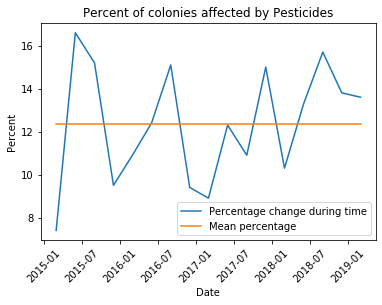

In [90]:
stressor = 'Pesticides'
state = disorder.loc[disorder.State == 'United States', ['Date', stressor]]
plt.plot(state.Date, state[stressor], label='Percentage change during time')
plt.plot(state.Date, [state[stressor].mean()] * len(state.Date), label='Mean percentage')
plt.xticks(rotation=45)
plt.title(f'Percent of colonies affected by {stressor}')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.legend();

Some of the known reasons for the colony losses are mites, parasites, pesticides and diseases. Using the disorder dataframe we can see how percentage of colonies affected by stressors. A colony can be affected by multiple stressors at the same time.

In [91]:
stressor = 'Parasites'

state_colonies = colonies.loc[colonies.State == 'United States', ['Date', 'Colonies', 'Lost', 'Percent lost', 'Added', 'Renovated', 'Percent renovated']]
state_colonies.set_index('Date', inplace=True)
state_disorder = disorder.loc[disorder.State == 'United States', :]
state_disorder.set_index('Date', inplace=True)

joined = state_colonies.join(state_disorder)
joined.drop('State', axis=1, inplace=True)

In [92]:
joined[stressor] = joined[stressor]/100 * state_colonies['Colonies']
joined

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Mites,Parasites,Diseases,Pesticides,Other,Unknown
Date,,,,,,,,,,,,
2015-03-01,2824610,500020,18,546980,270530,10,25.2,242916.46,3.1,7.4,6.9,4.3
2015-06-01,2849500,352860,12,661860,692850,24,43.4,555652.50,4.9,16.6,11.6,3.5
2015-09-01,3132880,457100,15,172990,303070,10,41.2,551386.88,8.0,15.2,8.8,4.8
2015-12-01,2874760,412380,14,117150,158790,6,37.0,327722.64,5.2,9.5,7.3,6.9
2016-03-01,2619940,416100,16,571880,245060,9,34.6,330112.44,6.2,10.9,6.9,5.4
2016-06-01,2801470,329820,12,736920,561160,20,53.4,456639.61,9.5,12.4,12.3,4.1
2016-09-01,3181180,397290,12,217320,282130,9,46.1,496264.08,6.7,15.1,9.3,4.5
2016-12-01,3032060,502350,17,124660,60390,2,46.6,512418.14,8.3,9.4,10.1,6.4
2017-03-01,2641090,398650,15,478240,241210,9,42.2,409368.95,7.0,8.9,7.2,7.4


In [93]:
joined.corr()

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Mites,Parasites,Diseases,Pesticides,Other,Unknown
Colonies,1.000000,0.296126,-0.145225,-0.622792,-0.212164,-0.284645,0.127624,0.486330,0.044562,0.330795,0.184993,-0.374215
Lost,0.296126,1.000000,0.892841,-0.542526,-0.813821,-0.811326,-0.369310,0.020160,-0.046437,-0.386627,-0.323616,0.139475
Percent lost,-0.145225,0.892841,1.000000,-0.262743,-0.735276,-0.702360,-0.431481,-0.208886,-0.069042,-0.540602,-0.430198,0.280592
Added,-0.622792,-0.542526,-0.262743,1.000000,0.722341,0.749643,-0.095166,-0.284277,-0.093081,-0.094215,0.129274,-0.107919
Renovated,-0.212164,-0.813821,-0.735276,0.722341,1.000000,0.995423,0.233747,0.026541,-0.018430,0.338479,0.464851,-0.175315
Percent renovated,-0.284645,-0.811326,-0.702360,0.749643,0.995423,1.000000,0.222198,-0.015763,-0.003806,0.293303,0.442094,-0.110617
Mites,0.127624,-0.369310,-0.431481,-0.095166,0.233747,0.222198,1.000000,0.716828,0.763967,0.602844,0.784287,0.314923
Parasites,0.486330,0.020160,-0.208886,-0.284277,0.026541,-0.015763,0.716828,1.000000,0.700750,0.679232,0.565554,0.109734
Diseases,0.044562,-0.046437,-0.069042,-0.093081,-0.018430,-0.003806,0.763967,0.700750,1.000000,0.366667,0.471846,0.494807
Pesticides,0.330795,-0.386627,-0.540602,-0.094215,0.338479,0.293303,0.602844,0.679232,0.366667,1.000000,0.520180,-0.228034


It actually makes sense. You can look at this correlations from another point of view. If you have more colonies, then you could lose more of them and that's why it's negatively correlated. Why are the stressors and colonies lost negatively correlated? Maybe you can look at this this way: you loose colonies because of those stuff and the more you loose affected colonies, the less affected colonies you will have and that's why all of those are negatively correlated. Because you loose more affected colonies and less not affected!

### Government investments

We talked to a specialist in the field working in the Swiss Bee Research Center and he told us that one of the reasons why bee colony numbers decline is because the government stops supporting beekepers. Since in this new dataset we have some data about government investments, we will try to analyze that.

In [94]:
def read_investments(path, index):
    data = []
    
    with open(path, encoding="utf8", errors='ignore') as input_file:
        reader = csv.reader(input_file)
        
        for cnt, row in enumerate(reader):
                
            if row[1] == 'd':
                data.append(row[2:])
    df = pd.DataFrame(data).T[:3]
    df.columns = df.iloc[0]
    df.drop(0, inplace=True)
    df.index = index
    return df.astype(int)

In [95]:
investments = pd.concat([read_investments('data/Honey/Hone-03-22-2017/hony_p06a_t017.csv', [2015, 2016]),
                        read_investments('data/Honey/hony0519/hony_p05a_t024.csv', [2017, 2018])])

investments

,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
2015,16128,6371,50283,9461,11156
2016,16042,6647,50307,7294,9014
2017,17240,5919,53075,9775,9989
2018,17788,4825,65220,9534,13646


In [96]:
mask = colonies['Date'].map(lambda x: x.month) == 3
selected = colonies.loc[(mask) & (colonies.State == 'United States')].iloc[:-1]
selected.index = investments.index
selected

,State,Colonies,Maximum,Lost,Percent lost,Added,Renovated,Percent renovated,Date
2015,United States,2824610,0,500020,18,546980,270530,10,2015-03-01
2016,United States,2619940,0,416100,16,571880,245060,9,2016-03-01
2017,United States,2641090,0,398650,15,478240,241210,9,2017-03-01
2018,United States,2635220,0,438030,17,511320,289200,11,2018-03-01


In [97]:
joined = selected.join(investments)
joined.drop(['Date', 'State', 'Maximum'], axis=1, inplace=True)
joined

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
2015,2824610,500020,18,546980,270530,10,16128,6371,50283,9461,11156
2016,2619940,416100,16,571880,245060,9,16042,6647,50307,7294,9014
2017,2641090,398650,15,478240,241210,9,17240,5919,53075,9775,9989
2018,2635220,438030,17,511320,289200,11,17788,4825,65220,9534,13646


In [98]:
joined.corr()

,Colonies,Lost,Percent lost,Added,Renovated,Percent renovated,Varroa control and treatment,Other colony issues 1/,Feed 2/,Foundation,Hives/woodenware
Colonies,1.000000,0.920507,0.755619,0.235038,0.281206,0.195928,-0.455465,0.303598,-0.379028,0.343200,0.108225
Lost,0.920507,1.000000,0.951209,0.399752,0.573349,0.483713,-0.372978,0.113095,-0.120061,0.231103,0.350797
Percent lost,0.755619,0.951209,1.000000,0.458933,0.754971,0.674200,-0.239926,-0.075019,0.118515,0.144981,0.525367
Added,0.235038,0.399752,0.458933,1.000000,-0.000866,-0.099371,-0.802450,0.596983,-0.424003,-0.799026,-0.318263
Renovated,0.281206,0.573349,0.754971,-0.000866,1.000000,0.993034,0.428324,-0.702751,0.739212,0.399312,0.944113
Percent renovated,0.195928,0.483713,0.674200,-0.099371,0.993034,1.000000,0.531258,-0.781681,0.809626,0.446108,0.974546
Varroa control and treatment,-0.455465,-0.372978,-0.239926,-0.802450,0.428324,0.531258,1.000000,-0.940788,0.874174,0.624284,0.695943
Other colony issues 1/,0.303598,0.113095,-0.075019,0.596983,-0.702751,-0.781681,-0.940788,1.000000,-0.975141,-0.582300,-0.887224
Feed 2/,-0.379028,-0.120061,0.118515,-0.424003,0.739212,0.809626,0.874174,-0.975141,1.000000,0.397521,0.878783
Foundation,0.343200,0.231103,0.144981,-0.799026,0.399312,0.446108,0.624284,-0.582300,0.397521,1.000000,0.590578


### Colony loss in Europe

New dataset, again porrly formatted!

In [99]:
df2016 = pd.read_csv('data/Europe/T0001-10.1080_00218839.2016.1260240.csv')
df2016['Year'] = 2016
df2017 = pd.read_csv('data/Europe/T0001-10.1080_00218839.2018.1460911.csv')
df2017['Year'] = 2017

df2018 = pd.read_csv('data/Europe/t0001-10.1080_00218839.2019.1615661.csv')
df2018['Year'] = 2018

In [ ]:
df2016.columns = df2016.columns.str.lower()
df2017.columns = df2017.columns.str.lower()
df2018.columns = df2018.columns.str.lower()

df2017 = df2017.loc[:, df2016.columns]
df2018 = df2018.loc[:, df2016.columns]

In [101]:
joined = df2016.append(df2017.append(df2018))
joined = joined.loc[~(joined.country.str.strip() == '')]
joined.replace('\(.*\)', '', regex=True, inplace=True)
joined.replace('\(.*', '', regex=True, inplace=True)
joined.replace(',', '', regex=True, inplace=True)
joined.replace('Overall.*', 'Overall', regex=True, inplace=True)
joined.replace('na', np.NaN, inplace=True)
joined['year'] = pd.to_datetime(joined['year'].astype(str))
joined.iloc[:,1:-3] = joined.iloc[:,1:-3].astype(float)
joined

,country,no. of respon-dents,no. of colonies going into winter,% mortality rate (95% ci),% rate of loss of colonies due to queen problems (95% ci),overall winter loss rate (95% ci),estimated % of beekeepers represented,effect of operation size,year
0,Austria,1289.0,23418.0,4.5,3.6,8.1,5,***M L < S,2016-01-01
1,Belgium,451.0,4064.0,6.9,5.2,12.2,5,Ns few in class M/L,2016-01-01
2,Czech Republic,968.0,17350.0,4.1,2.2,6.4,2,Ns few in class L,2016-01-01
3,Denmark,1186.0,12359.0,6.9,8.6,15.5,19,***L < S M,2016-01-01
4,Estonia,71.0,5115.0,11.2,4.3,15.5,1,**L < S,2016-01-01
...,...,...,...,...,...,...,...,...,...
62,Sweden,2260.0,19570.0,9.6,3.6,14.9,15,NaN,2018-01-01
64,Switzerland,1370.0,18807.0,7.9,5.2,13.8,8,NaN,2018-01-01
66,Ukraine,627.0,22621.0,6.7,2.1,11.3,<1,NaN,2018-01-01
68,Wales,34.0,214.0,13.1,10.7,26.6,2,NaN,2018-01-01


In [102]:
joined.corr()

,no. of respon-dents,no. of colonies going into winter,% mortality rate (95% ci),% rate of loss of colonies due to queen problems (95% ci),overall winter loss rate (95% ci)
no. of respon-dents,1.000000,0.964933,0.066607,-0.017901,0.024260
no. of colonies going into winter,0.964933,1.000000,0.043541,-0.033943,0.011666
% mortality rate (95% ci),0.066607,0.043541,1.000000,0.165977,0.815045
% rate of loss of colonies due to queen problems (95% ci),-0.017901,-0.033943,0.165977,1.000000,0.643850
overall winter loss rate (95% ci),0.024260,0.011666,0.815045,0.643850,1.000000


In [103]:
winter_loss = joined.loc[:, ['country', 'overall winter loss rate (95% ci)', 'year']]

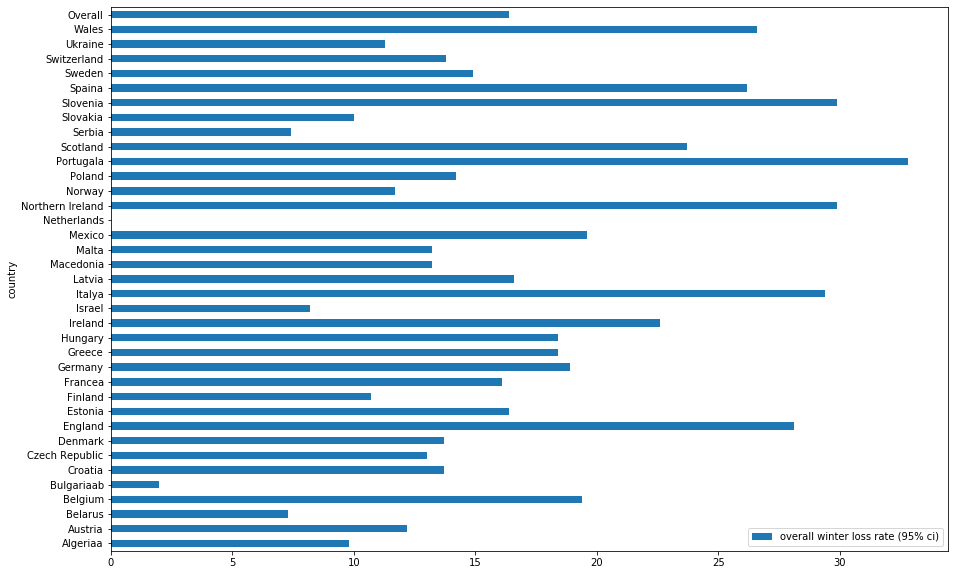

In [104]:
winter_loss.loc[winter_loss['year'] == '2018'].plot.barh(x='country', y='overall winter loss rate (95% ci)',
                                                        figsize=(15,10));

In [105]:
def convert(data, mask, year):
    df = data.copy()
    df = df.loc[(df['year'] == year) & df['country'].isin(mask)].T
    df.columns = list(df.iloc[0])
    df.drop(df.index[0], inplace=True)
    df.drop(df.index[1], inplace=True)
    df.index = [year]
    return df

In [106]:
mask = list(set(list(winter_loss.loc[winter_loss['year'] == '2016', 'country'])) 
            & set(list(winter_loss.loc[winter_loss['year'] == '2017', 'country'])) 
            & set(list(winter_loss.loc[winter_loss['year'] == '2018', 'country'])))

In [107]:
len(mask)

22

This data is bad, only 22 countries in the intersection, out of 37 in 2018 data

In [108]:
countries16 = convert(winter_loss.loc[(winter_loss['year'] == '2016') & winter_loss['country'].isin(mask)], mask, '2016')
countries17 = convert(winter_loss.loc[(winter_loss['year'] == '2017') & winter_loss['country'].isin(mask)], mask, '2017')
countries18 = convert(winter_loss.loc[(winter_loss['year'] == '2018') & winter_loss['country'].isin(mask)], mask, '2018')

In [109]:
stack = pd.concat([countries16, countries17, countries18], sort=True)
stack

,Austria,Belgium,Croatia,Czech Republic,Denmark,Estonia,Finland,Ireland,Israel,Latvia,...,Norway,Overall,Poland,Scotland,Slovakia,Slovenia,Sweden,Switzerland,Ukraine,Wales
2016,8.1,12.2,16.4,6.4,15.5,15.5,15.4,29.5,10.5,15,...,12.1,12,11.3,18,8.2,14.2,15.9,9.9,9.9,22.4
2017,23.4,23.4,23.1,15,19.3,13.4,14.6,13.3,14.6,18.5,...,7.7,20.9,21.8,20.4,16.2,19.6,15.2,20.8,17.9,19.8
2018,12.2,19.4,13.7,13,13.7,16.4,10.7,22.6,8.2,16.6,...,11.7,16.4,14.2,23.7,10,29.9,14.9,13.8,11.3,26.6


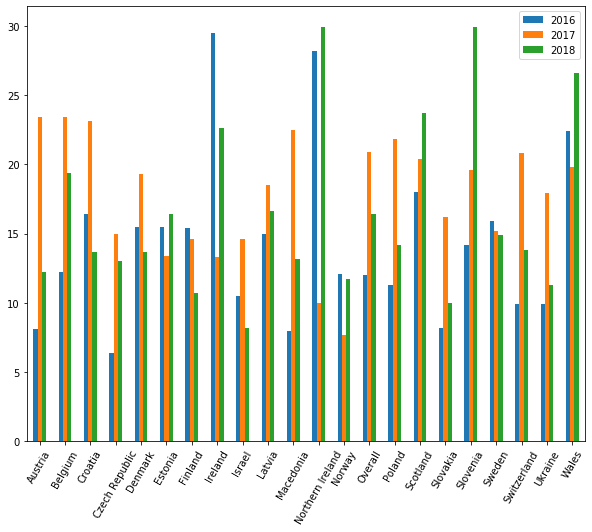

In [110]:
stack.T.plot.bar(figsize=(10, 8), rot=60);

We can see that this is just a mess and we cannot find any meaningful global trends.

# Looking at the price and production of natural honey

Here we would like to see if we can correlate the price, the production of honey with the number of beehives for each country.

First we get the data:

In [111]:
#load the data
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
bees=livestock.loc[livestock.Item=='Beehives']

prices = pd.read_csv('data/Prices_E_All_Data_(Normalized).csv',  encoding='iso-8859-1')
honey_price=prices.loc[prices.Item == 'Honey, natural']

production=pd.read_csv('data/Production_LivestockPrimary_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
honey_production=production.loc[(production.Item=='Honey, natural')  & (production.Element=='Production')]

In [112]:
countries = ['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia','Australia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium','Belgium-Luxembourg', 'Belize', 'Bolivia (Plurinational State of)','Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Burundi','Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba','Cyprus', 'Czechia', 'Czechoslovakia', 'Dominican Republic','Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia','Ethiopia PDR', 'Fiji', 'Finland', 'France', 'French Polynesia','Georgia', 'Germany', 'Greece', 'Greenland', 'Guadeloupe', 'Guam','Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti','Honduras', 'Hungary', 'India', 'Iran (Islamic Republic of)','Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kenya','Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Liechtenstein','Lithuania', 'Luxembourg', 'Madagascar', 'Mali', 'Martinique','Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique','Myanmar', 'Netherlands', 'New Caledonia', 'New Zealand','Nigeria', 'Niue', 'Occupied Palestinian Territory', 'Oman','Pakistan', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico','Republic of Korea', 'Republic of Moldova', 'Romania','Russian Federation', 'Rwanda', 'Samoa', 'Senegal', 'Serbia','Serbia and Montenegro', 'Slovakia', 'Slovenia', 'South Africa','Spain', 'Sudan', 'Sudan (former)', 'Sweden', 'Switzerland','Syrian Arab Republic', 'Tajikistan','The former Yugoslav Republic of Macedonia', 'Timor-Leste','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Tuvalu','Uganda', 'Ukraine', 'United Kingdom','United Republic of Tanzania', 'United States of America','Uruguay', 'USSR', 'Uzbekistan','Venezuela (Bolivarian Republic of)', 'Viet Nam','Wallis and Futuna Islands', 'Yemen', 'Yugoslav SFR', 'Zambia']

## Let's have a look a the data 

For each country, we plot the honey price and production on one figure and the number of beehives in a second one

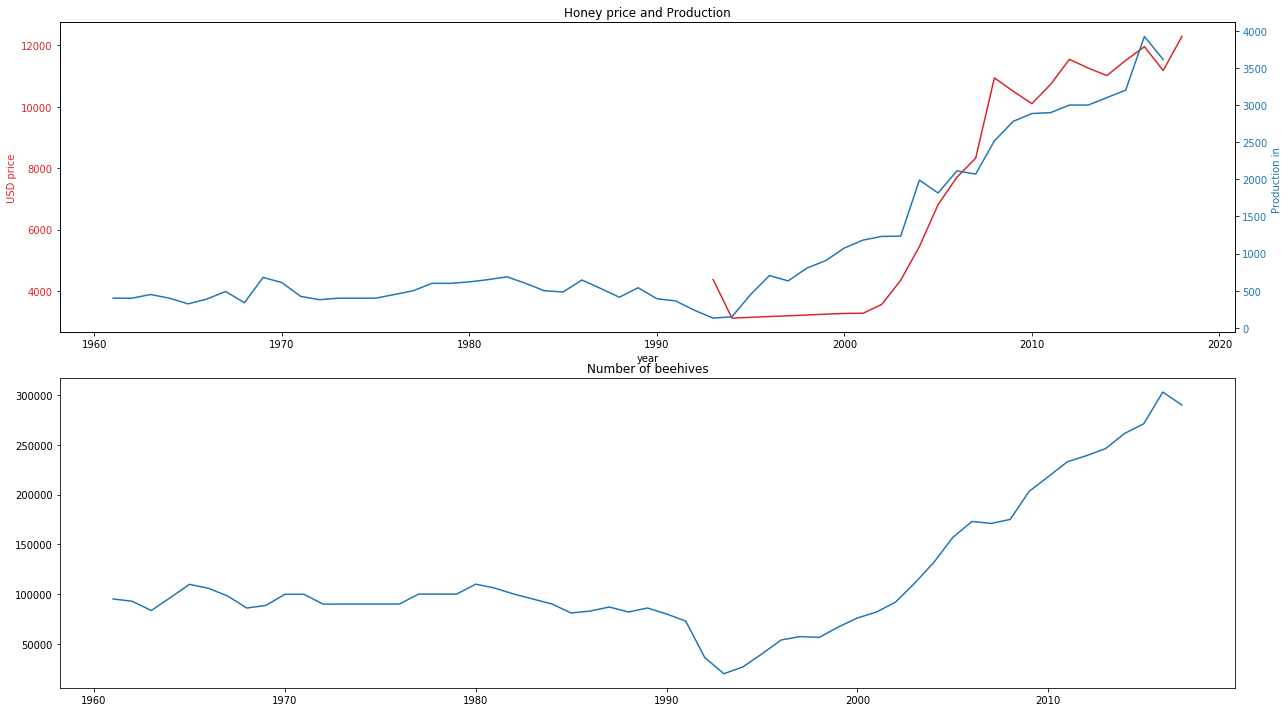

In [113]:
@interact
def HoneyPrice(country=countries):
    h_p = honey_price.loc[(honey_price.Area == country) & (honey_price.Unit =='USD')]
    b=bees.loc[bees.Area==country]
    prod=honey_production.loc[(honey_production.Area==country)]
    
    fig, ax1 = plt.subplots(2)
    
    fig.set_size_inches(18, 10)

    color = 'tab:red'
    ax1[0].set_title('Honey price and Production')
    ax1[0].set_xlabel('year')
    ax1[0].set_ylabel('USD price', color=color)
    ax1[0].plot(h_p.Year, h_p.Value, color=color)
    ax1[0].tick_params(axis='y', labelcolor=color)

    ax2 = ax1[0].twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Production in ', color=color)  # we already handled the x-label with ax1
    ax2.plot(prod.Year, prod.Value, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    
    ax1[1].plot(b.Year,b.Value)
    ax1[1].set_title('Number of beehives')

We can see here that there is a lot of data missing, especilly for the prices. most of the time we have no price data or only chuncks of it, not even from the same time period.

We can still try to correlate the data we have but we need to make sure that the series we are correlating have the same size and correspond to the same time period, in other case, it would not make any sense.



This utilities functions compute the correlation between the price and production of honey and the number of beehives for a particular country.

They check if correlation is possible and return the pearson's correlation of the extracted series
A Nan is returned if the correlation was not possible.

In [114]:
#Extract only the countries data
bees_countries = bees[bees['Area'].isin(countries)]
price_countries = honey_price[honey_price.Area.isin(countries)]
prod_countries = honey_production[honey_production.Area.isin(countries)]

In [115]:
def price_beehives_corr(c):
    bee = bees_countries.loc[bees_countries.Area == c]
    prod = prod_countries.loc[(prod_countries.Area == c)]
    
    if len(prod)>0 and len(bee)>0:
        min_year = max(bee.Year.min(),prod.Year.min())
        max_year = min(bee.Year.max(),prod.Year.max())

        bee = bee.loc[(bee.Year >= min_year) & (bee.Year<=max_year)]
        prod = prod.loc[(prod.Year >= min_year) & (prod.Year<=max_year)]
        
        
        if len(prod) == len(bee) and len(bee)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(bee.Value,prod.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan

In [116]:
def production_beehives_corr(c):
    bee = bees_countries.loc[bees_countries.Area == c]
    price = price_countries.loc[(price_countries.Area == c) & (price_countries.Unit == 'USD')]
    
    if len(price)>0 and len(bee)>0:
        min_year = max(bee.Year.min(),price.Year.min())
        max_year = min(bee.Year.max(),price.Year.max())

        bee = bee.loc[(bee.Year >= min_year) & (bee.Year<=max_year)]
        price = price.loc[(price.Year >= min_year) & (price.Year<=max_year)]
        
        
        if len(price) == len(bee) and len(bee)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(bee.Value,price.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan

In [117]:
def price_production_corr(c):
    prod = prod_countries.loc[prod_countries.Area == c]
    price = price_countries.loc[(price_countries.Area == c) & (price_countries.Unit == 'USD')]
    
    if len(price)>0 and len(prod)>0:
        min_year = max(prod.Year.min(),price.Year.min())
        max_year = min(prod.Year.max(),price.Year.max())

        prod = prod.loc[(prod.Year >= min_year) & (prod.Year<=max_year)]
        price = price.loc[(price.Year >= min_year) & (price.Year<=max_year)]
        
        
        if len(price) == len(prod) and len(prod)  > 9: #we check only if we have at least tenyears of data
            try:
                return sc.stats.pearsonr(prod.Value,price.Value)[0]
            except:
                return np.nan
        else:
            return np.nan
    else:
        return np.nan

Now we can compute each of these correlation in a new dataFrame:

In [118]:
corrs = []
index=[]
for c in countries:
    corr = []
    corr.append(price_beehives_corr(c))
    corr.append(price_production_corr(c))
    corr.append(production_beehives_corr(c))
    
    corrs.append(corr)
    index.append(c)
    
corrs = pd.DataFrame(data=corrs, columns=['price-beehives','price-prod','prod-beehives'],index=index)  

In [119]:
corrs.head(20)

,price-beehives,price-prod,prod-beehives
Albania,0.942499,NaN,NaN
Algeria,NaN,NaN,NaN
Angola,0.993842,NaN,NaN
Argentina,0.886085,NaN,NaN
Armenia,0.919345,0.816956,0.926064
Australia,0.496893,0.491085,0.282592
Austria,-0.290544,-0.590820,-0.004426
Azerbaijan,0.988442,NaN,NaN
Belarus,0.641695,0.190062,0.081357
Belgium,NaN,NaN,NaN


We can already see that a lot of data is missing.

Let's plot the distribution of the correlations 

/Users/alencarin/opt/anaconda3/envs/ada/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/alencarin/opt/anaconda3/envs/ada/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Distribution of the number of beehives and \n the honey production correlation\n accross countries ')

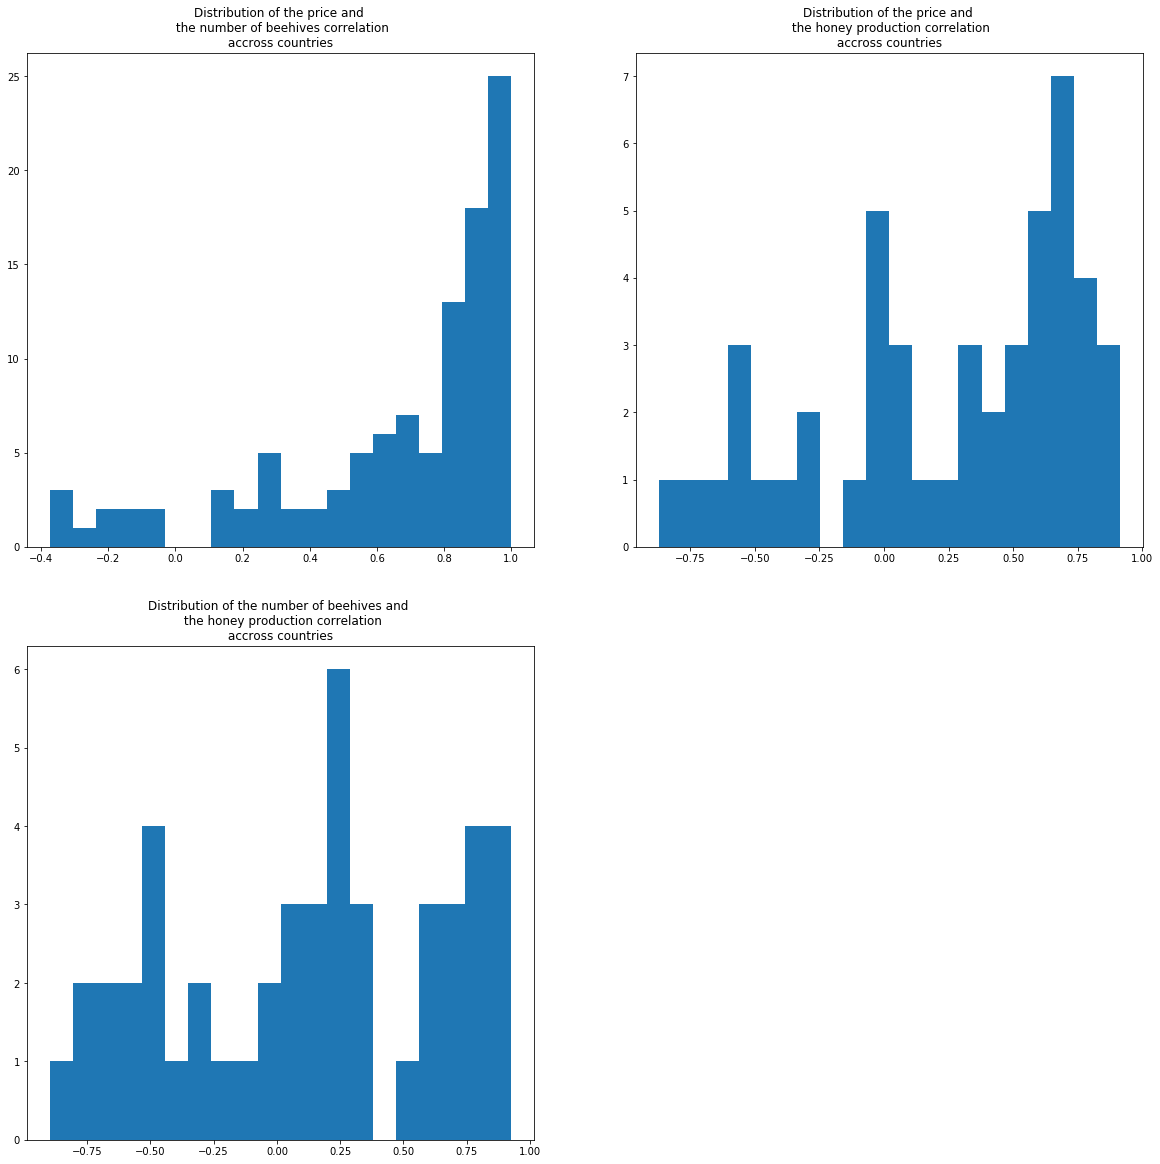

In [120]:
plt.figure(figsize=[20,20])
plt.subplot(221)
plt.hist(corrs['price-beehives'], bins=20)
plt.title('Distribution of the price and \n the number of beehives correlation\n accross countries ')

plt.subplot(222)
plt.hist(corrs['price-prod'], bins=20)
plt.title('Distribution of the price and \n the honey production correlation\n accross countries ')

plt.subplot(223)
plt.hist(corrs['prod-beehives'], bins=20)
plt.title('Distribution of the number of beehives and \n the honey production correlation\n accross countries ')

The distribution of the correlation of the honey price with the number of beehives seems to be left skewed, We can also distinguish the same pattern on the price/production plot. This could mean that, world wide, the number of beehives is generally dependent on the price of the honey.

If we find a way to predict the price of honey in the next year, we could be able to deduce if the number of beehives is going to increase or decrease in the next years.

This needs further research because too much data is missing, it's hard to say if those result are justified.

# Crops and beehives
The bees are the most important insects in the pollination process and we read that the pollination market is much bigger than the honey market. We will try to find some correlations between the yield of crop production and the number of beehives.

In [121]:
livestock = pd.read_csv('data/Production_Livestock_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
beehives = livestock.loc[livestock['Item'] == 'Beehives', ['Area', 'Value', 'Year']]
beehives.columns = ['Area', 'Beehives', 'Year']
beehives.reset_index(drop=True, inplace=True)
beehives.head()

,Area,Beehives,Year
0,Albania,95100.0,1961
1,Albania,92800.0,1962
2,Albania,83500.0,1963
3,Albania,96500.0,1964
4,Albania,109800.0,1965


In [122]:
crops = pd.read_csv('data/FAOSTAT/Production_Crops_E_All_Data_(Normalized).csv', encoding='iso-8859-1')
crops = crops.loc[(crops['Element'] == 'Yield'), ['Area', 'Item', 'Year', 'Value']]
crops.reset_index(drop=True, inplace=True)
crops.sort_values(inplace=True, by=['Area', 'Item', 'Year'])
crops.columns = ['Area', 'Item', 'Year', 'Tonnes']
crops.head()

,Area,Item,Year,Tonnes
0,Afghanistan,"Almonds, with shell",1976,16610.0
1,Afghanistan,"Almonds, with shell",1977,15000.0
2,Afghanistan,"Almonds, with shell",1978,20000.0
3,Afghanistan,"Almonds, with shell",1979,17500.0
4,Afghanistan,"Almonds, with shell",1980,17069.0


In [123]:
joined = crops.merge(beehives, on=['Area', 'Year'])
joined

,Area,Item,Year,Tonnes,Beehives
0,Africa,"Almonds, with shell",1961,2279.0,6845050.0
1,Africa,"Anise, badian, fennel, coriander",1961,9470.0,6845050.0
2,Africa,Apples,1961,70028.0,6845050.0
3,Africa,Apricots,1961,28790.0,6845050.0
4,Africa,Artichokes,1961,62154.0,6845050.0
...,...,...,...,...,...
578116,Zambia,"Tobacco, unmanufactured",2017,17927.0,60357.0
578117,Zambia,Tomatoes,2017,97655.0,60357.0
578118,Zambia,Vegetables Primary,2017,80649.0,60357.0
578119,Zambia,"Vegetables, fresh nes",2017,76356.0,60357.0


In [124]:
run_this_cell = False

if run_this_cell:
    
    crops_unique = crops['Item'].unique()
    countries_unique = crops['Area'].unique()

    countries_list = []
    crops_list = []
    corrs = []

    for country in countries_unique:
        for crop in crops_unique:

            corr = joined.loc[(joined['Area'] == country) & (joined['Item'] == crop), 
                              ['Tonnes', 'Beehives']].corr().iloc[0, 1]

            countries_list.append(country)
            crops_list.append(crop)
            corrs.append(corr)

    correlations = pd.DataFrame({'country': countries_list, 'crop': crops_list, 'correlation': corrs})
    correlations.to_pickle('crops_correlations')

In [125]:
correlations = pd.read_pickle('crops_correlations')

We read that one of the crops for which the bees are very important are almonds, that's why we will look into correlations between almonds production per area and number of beehives for all the continents and the World.

In [126]:
correlations.loc[(correlations['Crop'] == 'Almonds, with shell')]

,Area,Crop,Correlation
172,Africa,"Almonds, with shell",0.876024
516,Algeria,"Almonds, with shell",0.831269
860,Americas,"Almonds, with shell",0.562135
1376,Argentina,"Almonds, with shell",0.398638
1720,Asia,"Almonds, with shell",-0.002661
...,...,...,...
42656,Western Asia,"Almonds, with shell",0.470283
42828,Western Europe,"Almonds, with shell",0.805834
43172,World,"Almonds, with shell",0.783777
43344,Yemen,"Almonds, with shell",0.188454


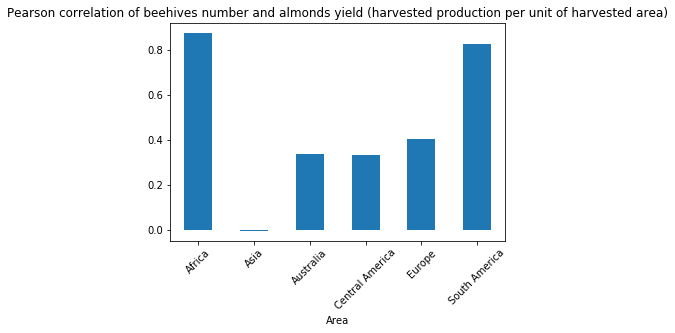

In [127]:
continents = ['Africa', 'Europe', 'Asia', 'Central America', 'South America', 'Australia']

cont_corr = correlations.loc[(correlations['Crop'] == 'Almonds, with shell') 
                 & (correlations['Area'].isin(continents)), ['Area', 'Correlation']]

cont_corr.plot.bar(x='Area', y='Correlation', legend=False, rot=45);
plt.title('Pearson correlation of beehives number and almonds yield (harvested production per unit of harvested area)');

We can see that there are some very big correlations between those. It would make sense to this for other crops as well.

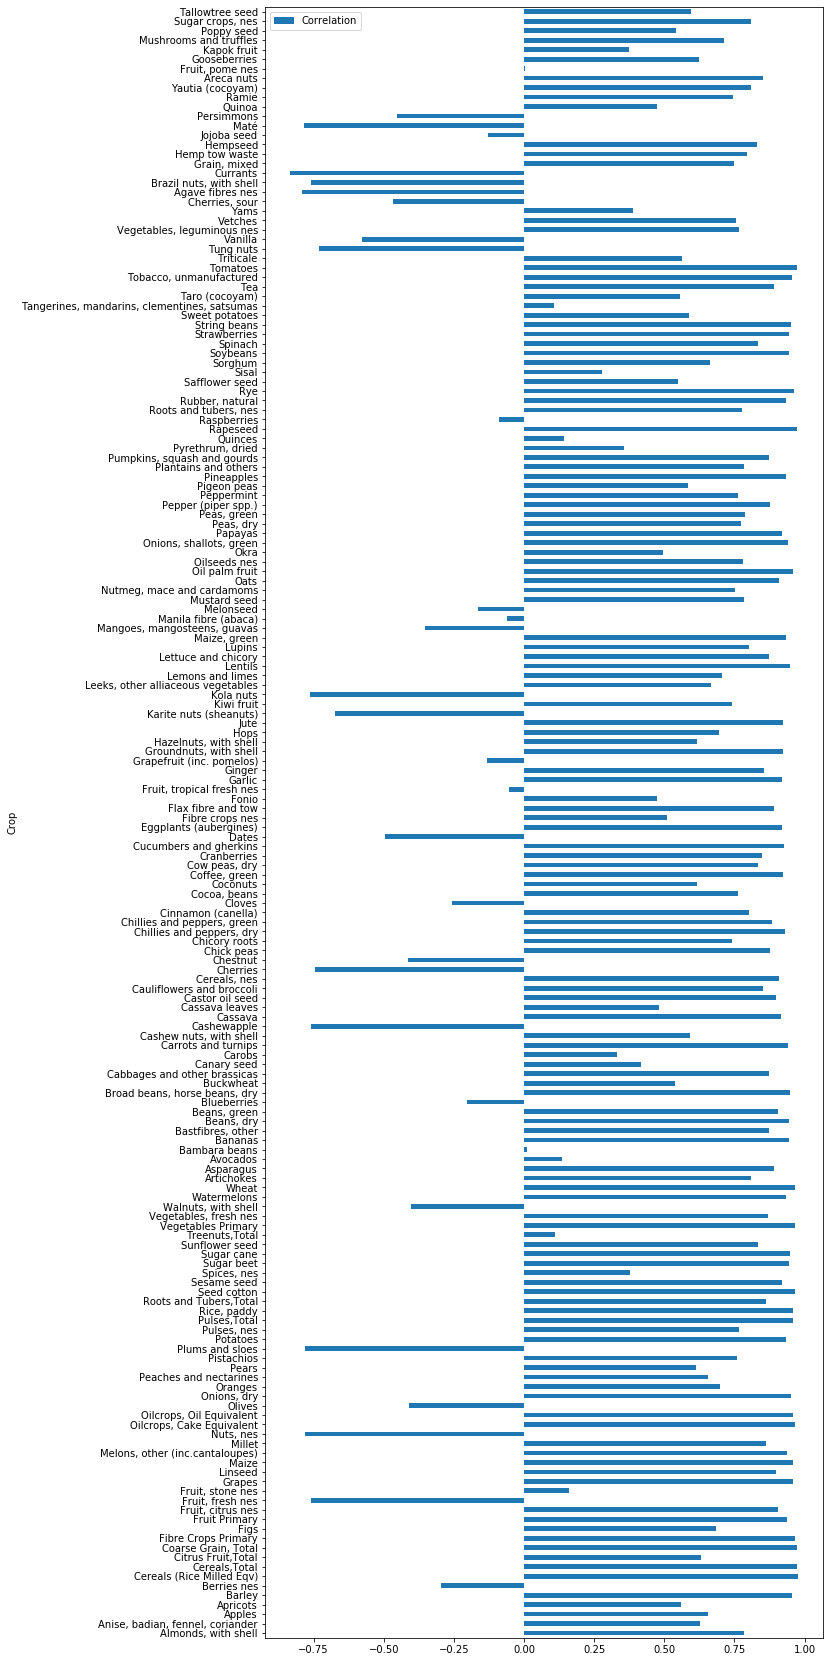

In [128]:
correlations.loc[(correlations['Area'] == 'World')].plot.barh(x='Crop', y='Correlation', figsize=(10, 30));

Wow!

# Conclusion

In this notebook we provide a descriptive analysis of the beehives dataset. Other datasets have also been analyzed in order to find correlations with the beehives data. The main discovery of this phase is that, against all our expectations, the number of beehives on the planet is increasing! This is good news! However, even if the global trend is increasing, in some countries the beehives population is decreasing. 

In the analysis we have then tried to find what factors could have an impact on this. In particular the factors taken into consideration are: 
- bees colonies stressers(parasites, diseases): datasets for USA and Europe only (interesting for knowledge about the topic, but not enough data to correlate to the FAO beehives dataset)
- pesticides: dataset not rich enough to find real correlations
- forests land: interesting correlation
- inland waters: interesting correlation
- agricultural land: interesting correlation
- honey price: dataset not rich enough
- government investments: not enough data(2015-2019 and just for USA)
- crops: interesting correlation between crops production and the number of beehives

Our priority for the next step will be to focus on which of the so far collected information will actually be useful and necessary to build a data story. We will continue our research in this direction, following those factors that at the moment seem to be the more related to beehives population. 
In this regard, we need to improve some of the metrics used in the analysis, such as the ratio of beehives (now divided by total land country surface) and the measure of increasing/decreasing of beehives population over the years.

Another step will be to use the most promising factors to find a model that is able to predict the number of beehives. We don't really know if this is feasible or not, but it would be nice to be able to determine the beehives population given some other external factors.

Finally, for the last step we are going to summarize all the collected knowledge into a well structured data story, and after that present data in visually appealing plots and maps into a website.

# A list of internal milestones up until project milestone 3
### 25. November (1st week)
- Making the maps interactive
- Building the website skeletton

### 2. December (2nd week)
- Selecting relevant parts for the datastory
- Work on feedback
- Create the story 

### 9. December (3rd week)
- Continue on the story 
- Putting the story on the webpage
- Clean the notebook so only relevant parts appear

### 16. December (4th week)
- Resolve issues on the page
- Beautify the page 
- Clean code 

### 20. December (Deadline)
